# Notebook for data preparation and visualization

In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import decomposition
import csv

warnings.simplefilter('ignore')
#line to print the plots here
%matplotlib inline
#Render images
%config inlineBackend.figure_format = 'svg'
folder_Firebrowse_GBM="Data/Firebrowse_GBM/"
folder_Verhaak="Data/Verhaak_Data/"
folder_TestSet="Data/First_data_split/TestSet/"
folder_TrainingSet="Data/First_data_split/TrainingSet/"

#Display more rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Provenance

All Data except for the RNASeq data was downloaded with RTCGAToolbox with the code TCGADownload.R that is in the Github Repository: https://github.com/CamilaDuitama/MasterThesis/blob/master/DownloadTCGA.R

RNASeq data was downloaded directly from the Firebrowse website: http://firebrowse.org/?cohort=GBM

√ Clinical Data

√ RNA Microarray Data

√ MicroArray miRNA

√ Methylation

√ Copy Number (GISTIC)

√ RNASeq

In [2]:
#Function to chop the ID of the samples in the Sample_status dataframe, because originally the ID's are longer.
def chop(x:str):
    return x[0:12]

### Clinical Data

In [3]:
clinical= pd.read_csv(folder_Firebrowse_GBM+"Clinical.csv", sep=",",header=0,index_col=0)
clinical["years_to_birth"] = clinical["years_to_birth"].apply(pd.to_numeric)
clinical["days_to_death"] = clinical["days_to_death"].apply(pd.to_numeric)
clinical["date_of_initial_pathologic_diagnosis"] = clinical["date_of_initial_pathologic_diagnosis"].apply(pd.to_numeric)
clinical["karnofsky_performance_score"] = clinical["karnofsky_performance_score"].apply(pd.to_numeric)
clinical["vital_status"] = clinical["vital_status"].apply(pd.to_numeric)
clinical=clinical.drop(columns=['Composite Element REF'])
new_index=pd.Series([w.replace(".","-").upper() for w in clinical.index.tolist()])
clinical.set_index(new_index,inplace=True)
clinical.head()

,years_to_birth,vital_status,days_to_death,days_to_last_followup,tumor_tissue_site,gender,date_of_initial_pathologic_diagnosis,radiation_therapy,karnofsky_performance_score,histological_type,race,ethnicity
TCGA-06-6391,44,1,45.0,NaN,brain,female,2011,no,NaN,untreated primary (de novo) gbm,white,not hispanic or latino
TCGA-19-A6J4,68,1,121.0,NaN,brain,male,2013,NaN,NaN,glioblastoma multiforme (gbm),black or african american,not hispanic or latino
TCGA-06-1806,47,1,466.0,NaN,brain,male,2009,yes,90.0,glioblastoma multiforme (gbm),white,not hispanic or latino
TCGA-06-5408,54,1,357.0,NaN,brain,female,2009,yes,80.0,untreated primary (de novo) gbm,white,not hispanic or latino
TCGA-06-5410,72,1,108.0,NaN,brain,female,2010,no,60.0,untreated primary (de novo) gbm,white,not hispanic or latino


In [4]:
#Karnosfky performance score : How healthy a patient is

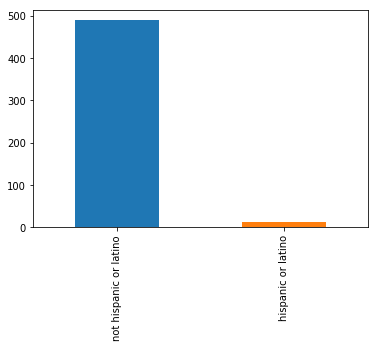

In [5]:
clinical['ethnicity'].value_counts().plot(kind='bar')

In [6]:
clinical.shape

(595, 12)

In [7]:
clinical_description=clinical.describe()
clinical_description.head(10)

,years_to_birth,vital_status,days_to_death,days_to_last_followup,date_of_initial_pathologic_diagnosis,karnofsky_performance_score
count,595.000000,595.000000,490.000000,102.000000,595.000000,442.000000
mean,57.816807,0.825210,504.500000,479.392157,2004.815126,77.036199
std,14.416311,0.380107,538.727567,540.490283,5.042524,15.621473
min,10.000000,0.000000,3.000000,0.000000,1989.000000,0.000000
25%,50.000000,1.000000,170.500000,156.250000,2002.000000,70.000000
50%,59.000000,1.000000,382.000000,261.000000,2006.000000,80.000000
75%,68.000000,1.000000,609.250000,628.000000,2009.000000,80.000000
max,89.000000,1.000000,3881.000000,2818.000000,2013.000000,100.000000


## RNA Microarray data

In [8]:
mRNAArray= pd.read_csv(folder_Firebrowse_GBM+'gdac.broadinstitute.org_GBM.Merge_transcriptome__ht_hg_u133a__broad_mit_edu__Level_3__gene_rma__data.Level_3.2016012800.0.0.csv', sep=",",header=0,index_col=0)
mRNAArray=mRNAArray.apply(pd.to_numeric)
mRNAArray=mRNAArray.transpose()
mRNAArray.index=mRNAArray.index.map(chop)
mRNAArray.head()

,AACS,FSTL1,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,SAMD4A,SMARCD3,A4GNT,C9orf39,PKNOX2,RALYL,ZHX3,ERCC5,RXFP3,APBB2,BBOX1,PRO0478,GCSH,XDH,EDN1,MTERF,PDCL3,CLK4,KCNG1,CXCR4,DECR1,SALL1,PTPRR,CADM4,IRAK1,CFHR5,HNRPD,TMSB10,CXCL3,LMAN1,SUHW1,CHD8,SUMO1,GP1BA,OR7A10,DDB1,CHRNA10,STYK1,MYO9B,CCNI,MMP7,EP300,CRNKL1,C9orf45,XAB2,RTN1,HIC2,TBX10,CENPQ,UTY,OR2W1,ATP5G2,ZEB1,ZG16,ERG,PARN,SOD2,JOSD3,ADAM5P,CHD9,hCG_40738,STK16,PDE1C,SEMA4D,AGPAT1,TOB2,BANK1,MAP3K3,MAX,GRM2,OSBPL8,PROSC,NR4A2,RICS,PIR,PPCS,IPO9,LONP1,EVC,CXCL13,SCYL3,KIAA1199,SORL1,NAT10,CHD1,SYN3,DMC1,SLC22A2,SERPINF1,C20orf27,OR7A17,RPS6KA5,LHB,TAOK3,STK25,SLC12A4,BRCA1,GBL,C14orf108,CDC25B,BMP3,MAP1LC3C,TMEM180,CRYGC,SLK,POU3F1,C20orf32,USP52,HIGD1B,BAZ1B,USP6NL,SLCO2B1,ABCD4,DIMT1L,SLC25A46,LARP7,TEK,CD160,TERF2IP,PHF20,COL1A1,KIAA0090,GTPBP1,GRK5,AP1S2,RAB33B,CA11,ALDOC,NUDT1,ZNF212,ACBD3,ZNF83,PRDM2,GDPD5,PDCD4,CEP350,FOXP3,SMYD3,CST7,SELL,CIAO1,LGI2,WDR45,ANKRD6,LTBP4,PSCD3,PYY,KCNC1,SIRT6,CCL19,ARHGEF9,ABR,C10orf22,STK17A,FOXE1,GML,CNGA3,CD38,ZDHHC6,NEFH,PGBD5,CTDSP2,RMND5B,ZNF257,DUSP4,FLJ22167,EXOSC7,ROR2,FOXM1,ZBTB48,BUD31,MAOA,CCDC41,TNNT3,FBXO11,GYPC,PLIN,RFXAP,C6orf15,RNF4,F8A1,PPP1R3D,GRB2,TPM3,SYT13,EPB42,RP5-1077B9.4,EIF1,CETN3,FPGT,PRY,NTHL1,POLR2B,RPS28,GDF10,COQ9,P2RX3,GCC2,RARRES3,PLXNA1,WBP4,KIAA0100,PMF1,HS2ST1,CRELD2,C8G,CD82,PMM1,CBLL1,LIM2,VAX2,SETDB1,LRAP,GCLM,CPEB3,PPM1A,INTS1,MMP16,CAMTA1,SAMSN1,DRD3,GMPPA,C11orf73,AIPL1,PTP4A2,IL24,BDKRB1,HPCA,MLF1,SEC14L1,CHFR,EMILIN1,THADA,TAF12,NDUFS4,ID1,PIK3CB,COL18A1,PDZD3,TBC1D17,COX8A,CDCA4,C2orf44,...,PTPN3,C11orf51,ZBED2,NPY2R,SCAMP2,SYT17,PLD3,ART3,SGSM2,OR1A2,SLC5A1,MLNR,EPHB6,POFUT1,C6orf25,STAC,CXXC4,TJP2,JARID1C,LILRA3,KRT10,SERINC1,CCT5,ARF3,RAB27A,SLC9A8,PEX19,CNP,EDN2,PSMD7,UQCR,CCDC121,SSX2IP,PPP1R3C,TM2D1,LRP4,TTC17,C4BPB,POMT2,ARL15,ZNF253,CHRNA9,SOX11,HIVEP3,SEP15,MRPL16,PKD2L1,RHBDD3,BMPR1B,PDE8B,ABLIM3,CENPC1,C2orf42,LTC4S,PSMC3,SMARCA2,FUT5,P4HB,ADH6,CST2,PLAC4,BRF2,RAMP2,BCL11A,F11R,CLUAP1,ZNF330,PSMB1,VIPR1,TXN,ACTA2,KIAA0947,REM1,FANCE,PLAC8,BECN1,GMPS,LGALS8,ANKRD1,DDR1,ATP6V1D,PTGS1,ALDOB,DCC,SPAG7,HOXD9,LOC440295,SYNPO,C6orf47,UBE3C,TRIT1,HOXC6,LRP2BP,PDSS2,MYST2,GABARAPL3,ARAF,PLA2G2E,KLF10,DCTN5,ASCL1,TSNAXIP1,HKDC1,PHF10,FAM131B,PSME3,IFNA10,NUP43,DBR1,NME3,CYP46A1,L1TD1,NMD3,CHN1,HGSNAT,RAG2,KIAA0754,TMED1,PMM2,VPS13C,METTL3,REXO2,SLC14A1,ANXA4,CA1,UAP1,KCNJ15,DHODH,TULP3,RPS14,ATP2A2,APBB1IP,ATIC,ONECUT2,ADAM15,FAM110B,NPL,LGR4,STRN,UEVLD,GAB1,SULT1B1,SNAI2,ZGPAT,KCNN4,SNF1LK,DLEU1,UBE2Q1,ZMYM6,JPH3,HEATR3,CYP2J2,FAM119B,FAM38A,APOL3,FLNA,YY2,IL2RB,SLCO4C1,DENND2D,KIAA0152,BAX,CP,LRPAP1,G6PC3,RPL37,NCOA4,LRRC14,GORASP1,FKBP1A,FXYD3,CYP24A1,SMARCAL1,NDUFS7,ABCB8,CCDC44,PRMT7,ZNF562,COQ2,USH1C,SRF,MAT2A,PGPEP1,TRPC3,SEMA4C,SIN3B,KLRD1,UTX,TRIM8,NDRG3,SLC10A3,SEMA3C,RNF6,GRAMD3,VAV1,PDGFC,CACNA1I,PEPD,S100A13,ARMCX2,TP63,ANXA11,CSF2RB,ZNF358,IFI44,DAZ4,EIF2C4,RPS6KA3,PHF21A,FAM49B,DACT1,ATP5G1,PPWD1,PNPLA2,DNAJC13,PAH,PTCH2,EAF2,ERCC2,TRMU,USP3,C14orf101,CCDC9,VPS13B,DCLRE1C,ST18,FRMD4B,PSMB9,RFPL1,LOC552889,CDC2L2,ProSAPiP1,ADRBK2,HCLS1,GPR15,CSF2,SLC2A11,GRIP2,MMP9,GPLD1,KIAA0802,DHRS2,RAB8A,SGEF,PIK3IP1,RPS27,SNRPD2,SLC39A6,CTSC,AQP7
TCGA-02-0001,6.500551,8.729663,5.511362,4.882953,10.984784,7.535193,8.674010,5.032552,4.710970,5.108478,4.788851,5.031860,4.354023,5.057832,6.938835,3.923728,4.968457,3.788748,3.899047,8.133074,4.583046,5.713743,6.320967,6.208020,6.104118,4.529051,7.861765,8.659940,4.674090,4.235680,4.395482,9.145942,4.147892,8.694796,13.174292,4.912342,4.603610,4.607337,7.034972,7.626174,4.648582,4.835915,7.965280,4.685791,5.943736,5.272516,10.186255,5.399321,6.373266,5.125710,4.378752,5.202034,5.334359,4.861035,4.336362,4.588574,4.300481,3.544995,10.813180,4.735778,4.383486,4.479868,7.531977,8.742529,7.911021,4.219728,6.129397,4.491577,5.436920,4.936893,6.990564,6.749265,6.335168,4.687241,6.416764,5.918338,4.813085,7.583604,5.470831,5.988463,5.496485,6.536004,9.139820,6.781858,7.956309,4.537492,8.743723,5.713169,6.072905,6.291494,7.148647,5.637882,4.578269,5.039334

In [9]:
mRNA_description=mRNAArray.describe()
mRNA_description.head(8)

,AACS,FSTL1,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,SAMD4A,SMARCD3,A4GNT,C9orf39,PKNOX2,RALYL,ZHX3,ERCC5,RXFP3,APBB2,BBOX1,PRO0478,GCSH,XDH,EDN1,MTERF,PDCL3,CLK4,KCNG1,CXCR4,DECR1,SALL1,PTPRR,CADM4,IRAK1,CFHR5,HNRPD,TMSB10,CXCL3,LMAN1,SUHW1,CHD8,SUMO1,GP1BA,OR7A10,DDB1,CHRNA10,STYK1,MYO9B,CCNI,MMP7,EP300,CRNKL1,C9orf45,XAB2,RTN1,HIC2,TBX10,CENPQ,UTY,OR2W1,ATP5G2,ZEB1,ZG16,ERG,PARN,SOD2,JOSD3,ADAM5P,CHD9,hCG_40738,STK16,PDE1C,SEMA4D,AGPAT1,TOB2,BANK1,MAP3K3,MAX,GRM2,OSBPL8,PROSC,NR4A2,RICS,PIR,PPCS,IPO9,LONP1,EVC,CXCL13,SCYL3,KIAA1199,SORL1,NAT10,CHD1,SYN3,DMC1,SLC22A2,SERPINF1,C20orf27,OR7A17,RPS6KA5,LHB,TAOK3,STK25,SLC12A4,BRCA1,GBL,C14orf108,CDC25B,BMP3,MAP1LC3C,TMEM180,CRYGC,SLK,POU3F1,C20orf32,USP52,HIGD1B,BAZ1B,USP6NL,SLCO2B1,ABCD4,DIMT1L,SLC25A46,LARP7,TEK,CD160,TERF2IP,PHF20,COL1A1,KIAA0090,GTPBP1,GRK5,AP1S2,RAB33B,CA11,ALDOC,NUDT1,ZNF212,ACBD3,ZNF83,PRDM2,GDPD5,PDCD4,CEP350,FOXP3,SMYD3,CST7,SELL,CIAO1,LGI2,WDR45,ANKRD6,LTBP4,PSCD3,PYY,KCNC1,SIRT6,CCL19,ARHGEF9,ABR,C10orf22,STK17A,FOXE1,GML,CNGA3,CD38,ZDHHC6,NEFH,PGBD5,CTDSP2,RMND5B,ZNF257,DUSP4,FLJ22167,EXOSC7,ROR2,FOXM1,ZBTB48,BUD31,MAOA,CCDC41,TNNT3,FBXO11,GYPC,PLIN,RFXAP,C6orf15,RNF4,F8A1,PPP1R3D,GRB2,TPM3,SYT13,EPB42,RP5-1077B9.4,EIF1,CETN3,FPGT,PRY,NTHL1,POLR2B,RPS28,GDF10,COQ9,P2RX3,GCC2,RARRES3,PLXNA1,WBP4,KIAA0100,PMF1,HS2ST1,CRELD2,C8G,CD82,PMM1,CBLL1,LIM2,VAX2,SETDB1,LRAP,GCLM,CPEB3,PPM1A,INTS1,MMP16,CAMTA1,SAMSN1,DRD3,GMPPA,C11orf73,AIPL1,PTP4A2,IL24,BDKRB1,HPCA,MLF1,SEC14L1,CHFR,EMILIN1,THADA,TAF12,NDUFS4,ID1,PIK3CB,COL18A1,PDZD3,TBC1D17,COX8A,CDCA4,C2orf44,...,PTPN3,C11orf51,ZBED2,NPY2R,SCAMP2,SYT17,PLD3,ART3,SGSM2,OR1A2,SLC5A1,MLNR,EPHB6,POFUT1,C6orf25,STAC,CXXC4,TJP2,JARID1C,LILRA3,KRT10,SERINC1,CCT5,ARF3,RAB27A,SLC9A8,PEX19,CNP,EDN2,PSMD7,UQCR,CCDC121,SSX2IP,PPP1R3C,TM2D1,LRP4,TTC17,C4BPB,POMT2,ARL15,ZNF253,CHRNA9,SOX11,HIVEP3,SEP15,MRPL16,PKD2L1,RHBDD3,BMPR1B,PDE8B,ABLIM3,CENPC1,C2orf42,LTC4S,PSMC3,SMARCA2,FUT5,P4HB,ADH6,CST2,PLAC4,BRF2,RAMP2,BCL11A,F11R,CLUAP1,ZNF330,PSMB1,VIPR1,TXN,ACTA2,KIAA0947,REM1,FANCE,PLAC8,BECN1,GMPS,LGALS8,ANKRD1,DDR1,ATP6V1D,PTGS1,ALDOB,DCC,SPAG7,HOXD9,LOC440295,SYNPO,C6orf47,UBE3C,TRIT1,HOXC6,LRP2BP,PDSS2,MYST2,GABARAPL3,ARAF,PLA2G2E,KLF10,DCTN5,ASCL1,TSNAXIP1,HKDC1,PHF10,FAM131B,PSME3,IFNA10,NUP43,DBR1,NME3,CYP46A1,L1TD1,NMD3,CHN1,HGSNAT,RAG2,KIAA0754,TMED1,PMM2,VPS13C,METTL3,REXO2,SLC14A1,ANXA4,CA1,UAP1,KCNJ15,DHODH,TULP3,RPS14,ATP2A2,APBB1IP,ATIC,ONECUT2,ADAM15,FAM110B,NPL,LGR4,STRN,UEVLD,GAB1,SULT1B1,SNAI2,ZGPAT,KCNN4,SNF1LK,DLEU1,UBE2Q1,ZMYM6,JPH3,HEATR3,CYP2J2,FAM119B,FAM38A,APOL3,FLNA,YY2,IL2RB,SLCO4C1,DENND2D,KIAA0152,BAX,CP,LRPAP1,G6PC3,RPL37,NCOA4,LRRC14,GORASP1,FKBP1A,FXYD3,CYP24A1,SMARCAL1,NDUFS7,ABCB8,CCDC44,PRMT7,ZNF562,COQ2,USH1C,SRF,MAT2A,PGPEP1,TRPC3,SEMA4C,SIN3B,KLRD1,UTX,TRIM8,NDRG3,SLC10A3,SEMA3C,RNF6,GRAMD3,VAV1,PDGFC,CACNA1I,PEPD,S100A13,ARMCX2,TP63,ANXA11,CSF2RB,ZNF358,IFI44,DAZ4,EIF2C4,RPS6KA3,PHF21A,FAM49B,DACT1,ATP5G1,PPWD1,PNPLA2,DNAJC13,PAH,PTCH2,EAF2,ERCC2,TRMU,USP3,C14orf101,CCDC9,VPS13B,DCLRE1C,ST18,FRMD4B,PSMB9,RFPL1,LOC552889,CDC2L2,ProSAPiP1,ADRBK2,HCLS1,GPR15,CSF2,SLC2A11,GRIP2,MMP9,GPLD1,KIAA0802,DHRS2,RAB8A,SGEF,PIK3IP1,RPS27,SNRPD2,SLC39A6,CTSC,AQP7
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.00000

In [10]:
mRNAArray.shape

(538, 12042)

In [11]:
def hist_col(label:str,df:pd.core.frame.DataFrame, description:pd.core.frame.DataFrame):
    """
    Function to plot the histogram of a column in a dataframe with its corresponding description

    Arguments:

    label: String that corresponds to the name of the column being analysed
    df: Dataframe that contains the column label
    description: Dataframe that comes as the output of df.describe()
    """
    # the histogram of the data
    mu=description.loc["mean",label]
    sigma=description.loc["std",label]
    num_bins = "auto"

    n, bins, patches = plt.hist(df[label], num_bins, normed=1, facecolor='blue', alpha=0.5)

    # add a 'best fit' line

    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.title(r'Histogram of '+label+' : $\mu='+str(mu)+'$, $\sigma='+str(sigma)+'$')

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()
    return


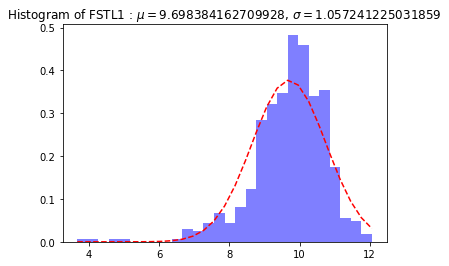

In [12]:
hist_col("FSTL1",mRNAArray,mRNA_description)

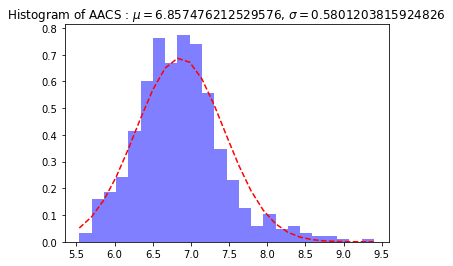

In [13]:
hist_col("AACS",mRNAArray,mRNA_description)

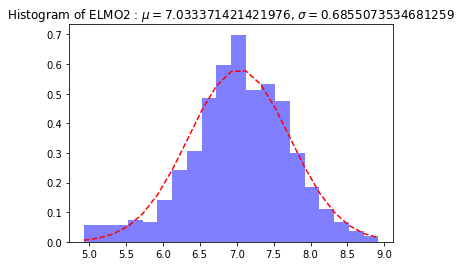

In [14]:
hist_col("ELMO2",mRNAArray,mRNA_description)

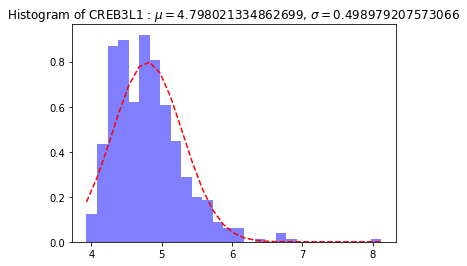

In [15]:
hist_col("CREB3L1",mRNAArray,mRNA_description)

## Comparison with Verhaak Gene Signature and Verhaak Sample

Note: Sample_satus data comes from this link: 

https://tcga-data.nci.nih.gov/docs/publications/gbm_exp/TCGA_unified_CORE_ClaNC840.txt

Which has the expression values and subtype calls for the Core TCGA samples using the unified scaled data

In [16]:
Sample_status=pd.read_csv(folder_Verhaak+'Sample_status.csv', sep=";", index_col=0)
Sample_status=Sample_status.transpose()
Sample_status=pd.DataFrame(Sample_status["Subtype"])
Sample_status=Sample_status.drop("Genes highly expressed in each subtype used for Gene Ontology",axis=0)
Sample_status.index=Sample_status.index.map(chop)
Sample_status.head()

,Subtype
TCGA-02-0003,Proneural
TCGA-02-0010,Proneural
TCGA-02-0011,Proneural
TCGA-02-0014,Proneural
TCGA-02-0024,Proneural


In [17]:
Sample_status=Sample_status.merge(clinical[["vital_status","days_to_death"]],how="left",left_index=True,right_index=True)
Sample_status.head()

,Subtype,vital_status,days_to_death
TCGA-02-0003,Proneural,1,144.0
TCGA-02-0010,Proneural,1,1077.0
TCGA-02-0011,Proneural,1,630.0
TCGA-02-0014,Proneural,1,2512.0
TCGA-02-0024,Proneural,1,1615.0


In [18]:
Sample_status.shape

(173, 3)

In [31]:
Verhaak_GS=pd.read_csv(folder_Verhaak+'Verhaak_gene_signature.csv', sep=";",header=0,index_col=0)
Verhaak_GS=pd.DataFrame(Verhaak_GS.index.tolist())
Verhaak_GS.columns=["Gene Symbol"]
Verhaak_GS.head()

,Gene Symbol
0,CDKN1B
1,EPB41
2,CLGN
3,PDE10A
4,RALGPS2


In [20]:
#How many genes of the Verhaak signature are in the mRNAArray dataset?

In [21]:
if(set(Verhaak_GS["Gene Symbol"].values).issubset(set(mRNAArray.columns))): 
    print("All genes in the Verhaak signature are in the mRNAArray dataset")

All genes in the Verhaak signature are in the mRNAArray dataset


In [22]:
#How many patients in the mRNAArray dataset are also Verhaak samples?

In [56]:
def check(df1: pd.DataFrame, df2: pd.DataFrame):
    """
    Function to check if the ids in one dataframe are also on the other dataframe  Arguments:
    df1= Larger dataframe
    df2= Smaller dataframe
    """
    
    d=dict()
    for x in df1.index.tolist():
        d[x]=list() 
    for i in df1.index.tolist():
        for j in df2.index.tolist():
            if i in j:
                d[i]=j
    return d

In [57]:
d=check(Sample_status,mRNAArray)
d

{'TCGA-02-0003': 'TCGA-02-0003',
 'TCGA-02-0004': 'TCGA-02-0004',
 'TCGA-02-0006': [],
 'TCGA-02-0007': 'TCGA-02-0007',
 'TCGA-02-0009': 'TCGA-02-0009',
 'TCGA-02-0010': 'TCGA-02-0010',
 'TCGA-02-0011': 'TCGA-02-0011',
 'TCGA-02-0014': 'TCGA-02-0014',
 'TCGA-02-0016': 'TCGA-02-0016',
 'TCGA-02-0021': 'TCGA-02-0021',
 'TCGA-02-0023': 'TCGA-02-0023',
 'TCGA-02-0024': 'TCGA-02-0024',
 'TCGA-02-0025': 'TCGA-02-0025',
 'TCGA-02-0026': 'TCGA-02-0026',
 'TCGA-02-0027': 'TCGA-02-0027',
 'TCGA-02-0028': 'TCGA-02-0028',
 'TCGA-02-0033': 'TCGA-02-0033',
 'TCGA-02-0034': 'TCGA-02-0034',
 'TCGA-02-0038': 'TCGA-02-0038',
 'TCGA-02-0039': 'TCGA-02-0039',
 'TCGA-02-0043': 'TCGA-02-0043',
 'TCGA-02-0046': 'TCGA-02-0046',
 'TCGA-02-0047': 'TCGA-02-0047',
 'TCGA-02-0048': 'TCGA-02-0048',
 'TCGA-02-0051': 'TCGA-02-0051',
 'TCGA-02-0054': 'TCGA-02-0054',
 'TCGA-02-0055': [],
 'TCGA-02-0057': 'TCGA-02-0057',
 'TCGA-02-0059': 'TCGA-02-0059',
 'TCGA-02-0060': 'TCGA-02-0060',
 'TCGA-02-0064': 'TCGA-02-0064',
 

In [58]:
result=0
for each in d.keys():
    if len(d[each])==0:
        print(each)
        result=result+1
print(str(result)+" patients in the Verhaak sample aren't in the mRNAArray dataset")

TCGA-02-0006
TCGA-02-0055
2 patients in the Verhaak sample aren't in the mRNAArray dataset


From here on I had to find the equivalence between the patient IDs used by Verhaak and the ones on the Firebrowse TCGA data set

In [59]:
Verhaak_id=list()
Firebrowse_id=list()
for each in d.keys():
    if len(d[each])>0:
        Verhaak_id.append(each)
        Firebrowse_id.append(d[each])
    else:
        Verhaak_id.append(each)
        Firebrowse_id.append(None)
dummie=pd.DataFrame()
dummie["CLID"]=Verhaak_id
dummie["Hybridization REF"]=Firebrowse_id
dummie.head()

,CLID,Hybridization REF
0,TCGA-02-0003,TCGA-02-0003
1,TCGA-02-0010,TCGA-02-0010
2,TCGA-02-0011,TCGA-02-0011
3,TCGA-02-0014,TCGA-02-0014
4,TCGA-02-0024,TCGA-02-0024


In [72]:
labels=dummie.merge(Sample_status, how="left", left_on="CLID",right_index=True)
labels.head()

,CLID,Hybridization REF,Subtype,vital_status,days_to_death
0,TCGA-02-0003,TCGA-02-0003,Proneural,1,144.0
1,TCGA-02-0010,TCGA-02-0010,Proneural,1,1077.0
2,TCGA-02-0011,TCGA-02-0011,Proneural,1,630.0
3,TCGA-02-0014,TCGA-02-0014,Proneural,1,2512.0
4,TCGA-02-0024,TCGA-02-0024,Proneural,1,1615.0


In [119]:
#Code to mark the samples in mRNAArray as one of the four subclasses of GBM or as other, and assign a color to them
result=list()
for i in mRNAArray.index.tolist():
    if i in labels["Hybridization REF"].tolist():
        index=labels["Hybridization REF"].tolist().index(i)
        result.append(labels.loc[index,"Subtype"])
    else:
        result.append("Other")
result=pd.DataFrame(result,columns=["target"])
result.head(20)

,target
0,Other
1,Proneural
2,Mesenchymal
3,Classical
4,Classical
5,Proneural
6,Proneural
7,Proneural
8,Other
9,Classical


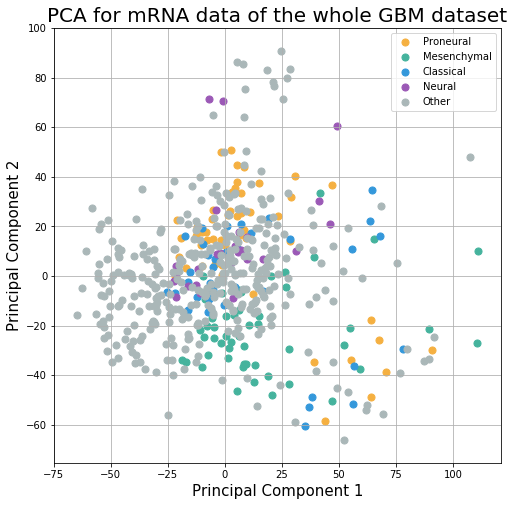

In [29]:
pca = decomposition.PCA(n_components=2)
PC = pca.fit_transform(mRNAArray.values)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets=["Proneural","Mesenchymal","Classical","Neural","Other"]
colors = ["#F5B041", '#45B39D', '#3498DB',"#9B59B6","#AAB7B8"]
ax.set_title('PCA for mRNA data of the whole GBM dataset', fontsize = 20)
for target,color in zip(targets,colors):
    indicesToKeep = result['target'] == target
    ax.scatter(PC[indicesToKeep,0]
               , PC[indicesToKeep,1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()   


#### PCA with the Verhaak signature and samples only

In [62]:
col=Verhaak_GS["Gene Symbol"].tolist()
ind=[x for x in d.values() if x!=[]]

In [63]:
Verhaak=mRNAArray.loc[ind,col]
Verhaak_description=Verhaak.describe()
Verhaak_description.head(10)

,CDKN1B,EPB41,CLGN,PDE10A,RALGPS2,TAF5,ACTR1A,PELI1,ZNF804A,PPM1D,RAD21,SORCS3,ALCAM,PURG,SLC1A1,NR0B1,FBXO21,GADD45G,GABRA3,FHOD3,TMSL8,LRRTM4,PAFAH1B3,FAM110B,REEP1,SNX26,LRP6,C1QL1,TMCC1,GSK3B,MMP16,LPHN3,DLL3,SEC61A2,ICK,RAP2A,ZNF286A,FAM125B,ZEB2,AMOTL2,NKX2-2,TTC3,TOP2B,SCN3A,TOX3,MLLT11,RALGPS1,GSTA4,DGKI,MTSS1,SATB1,KIF21B,PODXL2,CRMP1,GNG4,MYT1,BCL7A,CHD7,SOX4,SOX11,DCX,C6orf134,FAM77C,MARCKSL1,C1orf106,DBN1,DPYSL4,TMEFF1,STMN4,DUSP26,PAK7,PAK3,MAST1,TNRC4,CDK5R1,ATP1A3,FGF9,WASF1,CA10,RP11-35N6.1,SOX10,ERBB3,RAB33A,IL1RAPL1,DNM3,GPR17,CLASP2,PPM1E,STMN1,FLRT1,EPHB1,HDAC2,PHF16,LOC81691,CDC7,MYB,MCM10,ATAD5,HMGB3,CDC25A,TOPBP1,HN1,AOF2,SLCO5A1,NOL4,YPEL1,CXXC4,ZNF643,KLRK1,KLRC4,KLRC3,PCDH11Y,PCDH11X,HRASLS,KIAA1166,ZNF184,CASK,ZNF711,ZNF510,WDR68,MYST2,CBX1,CAMSAP1L1,HOXD3,MATR3,TMEM118,LOC55565,VAX2,TMEM35,NRXN1,SPTBN2,NCALD,SOX2,SCG3,TTYH1,C1orf61,GPM6A,DPF1,RUFY3,NRXN2,NCAM1,MAPT,SRGAP3,FXYD6,ABAT,PHLPP,OLIG2,MAP2,BCAN,NLGN3,CSPG5,DPP6,MYO10,BAI3,ASCL1,SEZ6L,CKB,CRB1,GRIA2,ARHGEF9,VEZF1,MMP15,MARCKS,BEX1,CNTN1,E2F3,RBPJ,BCOR,P2RX7,C20orf42,CSNK1E,ZNF248,PLCB4,PFN2,GPR23,GRID2,MPPED2,TSPAN3,TTPA,SIRT5,CASQ1,AKR7A3,MRPL49,GUK1,VSX1,NDRG2,PPP2R5A,RND1,ZNF323,LYRM1,SEPW1,USP33,ANKRD46,SPAST,PRPSAP2,PDE6D,ORC4L,SCHIP1,NSL1,CRBN,CRYZL1,ACYP2,MGST3,PEX19,MDH1,ATP5L,TSNAX,MAT2B,YPEL5,TCEAL1,CALM2,ATP5F1,COX5B,PEX11B,IMPA1,TTC1,GABARAPL2,NDUFS3,FBXO3,CCDC121,CRYL1,SNX11,GABRB2,SERPINI1,KCNK1,SNCG,CPNE6,KCNJ3,GRM1,VIP,HPCAL4,HPCA,CRYM,CCK,GPR22,CHN1,CA4,ADD3,CAMK2G,NTSR2,AGXT2L1,EDG1,MYBPC1,PPP1R1A,FEZF2,LOC201229,SLCO1A2,DHRS9,FLJ22655,THTPA,...,MEGF8,CD3EAP,PRKD2,IRF3,B3GALT1,CDH2,NOS2A,FBXO17,MAB21L1,CDH6,SEPT11,KLHL4,EXTL3,KLHDC8A,SMO,GLI2,RFX2,GNAS,ZFHX4,LRP5,KLHL25,RGS12,CLIP2,POMT2,SARS2,TLE2,VPS16,JUND,MYO5C,TGFB3,ILK,SNTA1,GJA1,NDP,UAP1,YAP1,LTBP1,SYPL1,RABGAP1L,ALDH3B1,LOX,FHL2,IGFBP6,DCBLD2,BNC2,CASP8,HEXA,COL8A2,TES,AIM1,ENG,FXYD5,LY75,PLAU,SH2B3,CDCP1,TRIM38,SP100,FES,S100A4,P4HA2,COL5A1,COL1A2,COL1A1,THBS1,IL1R1,LAMB1,LTBP2,RAB27A,HEXB,TMBIM1,COPZ2,ANXA4,PGCP,SRPX2,ZNF217,DRAM,MRC2,WWTR1,SERPINE1,CLCF1,LRRFIP1,FURIN,RBMS1,NRP1,MYH9,ADAM12,MVP,FER1L3,IQGAP1,CAST,SHC1,ITGA5,FNDC3B,GLT25D1,TCIRG1,TGOLN2,TNFRSF1A,ANXA1,PTRF,EHD2,EFEMP2,TIMP1,LGALS1,LGALS3,CHI3L1,CLIC1,CCDC109B,EMP3,ANXA2,PDPN,PYGL,ARSJ,SWAP70,TRADD,PLS3,ICAM3,VAMP5,RRAS,PROCR,RAB32,ASL,RELB,TGFBI,SLC16A3,IL15RA,ELF4,SLC10A3,GCNT1,LYPLA3,DSC2,MAPK13,HK3,MAN2B1,GRN,CEBPB,MGAT1,FLJ20273,POLD4,VDR,NOD2,DAB2,PTGER4,THBD,PLAUR,CASP5,CASP4,CASP1,SLAMF8,FLJ22662,RHOG,CTSB,CTSC,TGFBR2,IL4R,LHFPL2,GNA15,TNFRSF1B,CCR5,DOK3,BATF,RAC2,NCF2,KYNU,DSE,C1orf38,ITGAM,MS4A4A,MSR1,IFI30,NCF4,CD14,SIGLEC9,PTPN6,MYO1F,LAIR1,LAPTM5,ITGB2,TLR2,PTPRC,ALOX5,LCP1,FCGR2A,CD4,LCP2,CSTA,SERPINA1,PSCD4,MAFB,SYNGR2,STXBP2,ARPC1B,SIGLEC7,LILRB3,NPC2,TRPM2,FMNL1,LY96,SLC11A1,ECGF1,MFSD1,SQRDL,PSCDBP,S100A11,TNFAIP8,FPRL2,C5AR1,LILRB2,AMPD3,STAB1,MAN1A1,CTSZ,STAT6,FCGR2B,ST14,ACSL1,SCPEP1,ACPP,RAB11FIP1,TNFRSF11A,WIPF1,TNFAIP3,PTPN22,SAT1,PLK3,SEC24D,CLEC2B,MAN2A1,BDKRB2,CD2AP,SFT2D2,RUNX2,ITGA4,HFE,FHOD1,TRIM22,PHF11,RBKS,MGST2,C1orf54,BLVRB,CYBRD1,ARHGAP29,CNN2,TLR4,PIGP,UCP2,FOLR2,TEC,S100A13
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.00

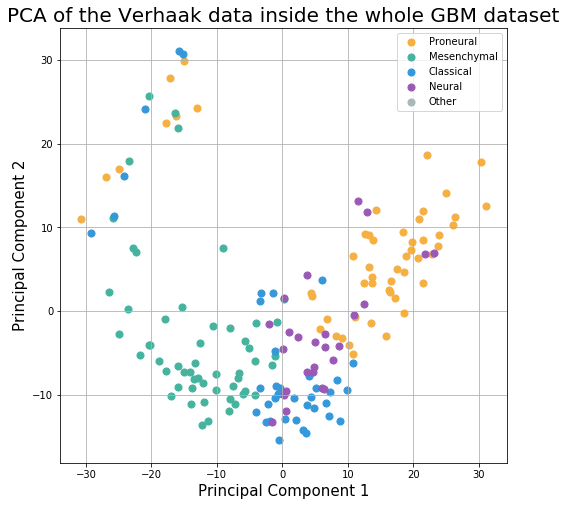

In [64]:
#Code to mark the samples in mRNAArray as one of the four subclasses of GBM or as other
result=list()
for i in Verhaak.index.tolist():
    if i in labels["Hybridization REF"].tolist():
        index=labels["Hybridization REF"].tolist().index(i)
        result.append(labels.loc[index,"Subtype"])
    else:
        result.append("Other")
result=pd.DataFrame(result,columns=["target"])
result.head()

#Code to build the PCA plot
pca = decomposition.PCA(n_components=2)
PC = pca.fit_transform(Verhaak.values)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets=["Proneural","Mesenchymal","Classical","Neural","Other"]
colors = ["#F5B041", '#45B39D', '#3498DB',"#9B59B6","#AAB7B8"]
ax.set_title('PCA of the Verhaak data inside the whole GBM dataset', fontsize = 20)
for target,color in zip(targets,colors):
    indicesToKeep = result['target'] == target
    ax.scatter(PC[indicesToKeep,0]
               , PC[indicesToKeep,1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()   


In [65]:
_series=pd.Series(data=result["target"].values,index=Verhaak.index)

In [66]:
#The function getDiffExpressedGenes which is used to build the heatmap described in :
#https://bioconductor.org/packages/release/bioc/vignettes/RTCGAToolbox/inst/doc/RTCGAToolbox-vignette.html#reproducing-brca-results-from-original-manuscript
# Needs a control sample (i guess the positive and negative values come from a logFC)


#### Vital status

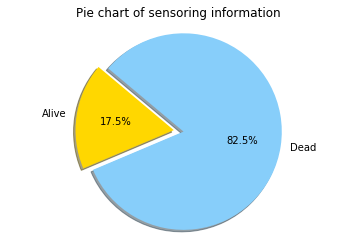

In [67]:
vital_status=clinical["vital_status"].apply(int)
ones=vital_status.sum()
zeroes=len(vital_status)-ones
# Data to plot
labels = 'Alive', 'Dead'
sizes = [zeroes,ones]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Pie chart of sensoring information")
plt.axis('equal')
plt.show()

In [77]:
#Code to mark the samples in mRNAArray as one of the four subclasses of GBM or as other, and assign a color to them
result=list()
for i in clinical.index.tolist():
    if i in labels["CLID"].tolist():
        index=labels["CLID"].tolist().index(i)
        result.append(labels.loc[index,"Subtype"])
    else:
        result.append("Other")
result=pd.DataFrame(result,columns=["target"])
result.head()

,target
0,Other
1,Other
2,Other
3,Other
4,Other


Text(0.5, 1.0, 'Histogram of Tumour subtypes in Clinical Data for Firebrowse GBM')

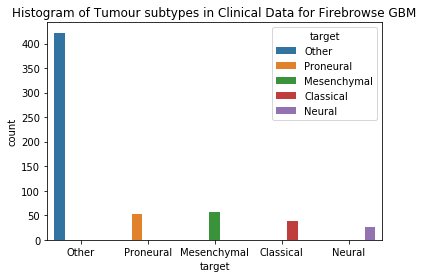

In [78]:
ax = sns.countplot(x="target", data=result,hue="target")
ax.set_title("Histogram of Tumour subtypes in Clinical Data for Firebrowse GBM")

## MicroArray miRNA

Quote from the https://confluence.broadinstitute.org/download/attachments/29790363/nature10166-s1.pdf?version=1&modificationDate=1335477590000 paper that describes how the pipeline to obtain this data:

"Data Processing

Data was quantile normalized on the probe level. Signals from probes measuring the same
microRNA are summed up to generate gene‐centric total gene signal, followed by log2
transformation. Distance Weighted Discrimination (DWD) method is applied to data for batch‐ 
correction."

In [79]:
miRNA= pd.read_csv(folder_Firebrowse_GBM+'gdac.broadinstitute.org_GBM.Merge_mirna__h_mirna_8x15k__unc_edu__Level_3__unc_DWD_Batch_adjusted__data.Level_3.2016012800.0.0.csv', sep=",",header=0,index_col=0)
miRNA=miRNA.apply(pd.to_numeric)
miRNA=miRNA.transpose()
miRNA.index=miRNA.index.map(chop)
miRNA.head()

,ebv-miR-BART1-3p,ebv-miR-BART1-5p,ebv-miR-BART10,ebv-miR-BART11-3p,ebv-miR-BART11-5p,ebv-miR-BART12,ebv-miR-BART13,ebv-miR-BART14-3p,ebv-miR-BART14-5p,ebv-miR-BART15,ebv-miR-BART16,ebv-miR-BART17-3p,ebv-miR-BART17-5p,ebv-miR-BART18,ebv-miR-BART19,ebv-miR-BART2,ebv-miR-BART20-3p,ebv-miR-BART20-5p,ebv-miR-BART3-3p,ebv-miR-BART3-5p,ebv-miR-BART4,ebv-miR-BART5,ebv-miR-BART6-3p,ebv-miR-BART6-5p,ebv-miR-BART7,ebv-miR-BART8-3p,ebv-miR-BART8-5p,ebv-miR-BART9,ebv-miR-BHRF1-1,ebv-miR-BHRF1-2,ebv-miR-BHRF1-2*,ebv-miR-BHRF1-3,hcmv-miR-UL112,hcmv-miR-UL148D,hcmv-miR-UL22A,hcmv-miR-UL22A*,hcmv-miR-UL36,hcmv-miR-UL70-3p,hcmv-miR-UL70-5p,hcmv-miR-US25-1,hcmv-miR-US25-2-3p,hcmv-miR-US25-2-5p,hcmv-miR-US33,hcmv-miR-US4,hcmv-miR-US5-1,hcmv-miR-US5-2,hsa-let-7a,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f,hsa-let-7g,hsa-let-7i,hsa-miR-1,hsa-miR-100,hsa-miR-101,hsa-miR-103,hsa-miR-105,hsa-miR-106a,hsa-miR-106b,hsa-miR-107,hsa-miR-10a,hsa-miR-10b,hsa-miR-122a,hsa-miR-124a,hsa-miR-125a,hsa-miR-125b,hsa-miR-126,hsa-miR-126*,hsa-miR-127,hsa-miR-128a,hsa-miR-128b,hsa-miR-129,hsa-miR-130a,hsa-miR-130b,hsa-miR-132,hsa-miR-133a,hsa-miR-133b,hsa-miR-134,hsa-miR-135a,hsa-miR-135b,hsa-miR-136,hsa-miR-137,hsa-miR-138,hsa-miR-139,hsa-miR-140,hsa-miR-141,hsa-miR-142-3p,hsa-miR-142-5p,hsa-miR-143,hsa-miR-144,hsa-miR-145,hsa-miR-146a,hsa-miR-146b,hsa-miR-147,hsa-miR-148a,hsa-miR-148b,hsa-miR-149,hsa-miR-150,hsa-miR-151,hsa-miR-152,hsa-miR-153,hsa-miR-154,hsa-miR-154*,hsa-miR-155,hsa-miR-15a,hsa-miR-15b,hsa-miR-16,hsa-miR-17-3p,hsa-miR-17-5p,hsa-miR-181a,hsa-miR-181a*,hsa-miR-181b,hsa-miR-181c,hsa-miR-181d,hsa-miR-182,hsa-miR-182*,hsa-miR-183,hsa-miR-184,hsa-miR-185,hsa-miR-186,hsa-miR-187,hsa-miR-188,hsa-miR-189,hsa-miR-18a,hsa-miR-18a*,hsa-miR-18b,hsa-miR-190,hsa-miR-191,hsa-miR-191*,hsa-miR-192,hsa-miR-193a,hsa-miR-193b,hsa-miR-194,hsa-miR-195,hsa-miR-196a,hsa-miR-196b,hsa-miR-197,hsa-miR-198,hsa-miR-199a,hsa-miR-199a*,hsa-miR-199b,hsa-miR-19a,hsa-miR-19b,hsa-miR-200a,hsa-miR-200a*,hsa-miR-200b,hsa-miR-200c,hsa-miR-202,hsa-miR-202*,hsa-miR-203,hsa-miR-204,hsa-miR-205,hsa-miR-206,hsa-miR-208,hsa-miR-20a,hsa-miR-20b,hsa-miR-21,hsa-miR-210,hsa-miR-211,hsa-miR-212,hsa-miR-214,hsa-miR-215,hsa-miR-216,hsa-miR-217,hsa-miR-218,hsa-miR-219,hsa-miR-22,hsa-miR-220,hsa-miR-221,hsa-miR-222,hsa-miR-223,hsa-miR-224,hsa-miR-23a,hsa-miR-23b,hsa-miR-24,hsa-miR-25,hsa-miR-26a,hsa-miR-26b,hsa-miR-27a,hsa-miR-27b,hsa-miR-28,hsa-miR-296,hsa-miR-299-3p,hsa-miR-299-5p,hsa-miR-29a,hsa-miR-29b,hsa-miR-29c,hsa-miR-301,hsa-miR-302a,hsa-miR-302a*,hsa-miR-302b,hsa-miR-302b*,hsa-miR-302c,hsa-miR-302c*,hsa-miR-302d,hsa-miR-30a-3p,hsa-miR-30a-5p,hsa-miR-30b,hsa-miR-30c,hsa-miR-30d,hsa-miR-30e-3p,hsa-miR-30e-5p,hsa-miR-31,hsa-miR-32,hsa-miR-320,hsa-miR-323,hsa-miR-324-3p,hsa-miR-324-5p,hsa-miR-325,hsa-miR-326,hsa-miR-328,hsa-miR-329,hsa-miR-33,hsa-miR-330,hsa-miR-331,hsa-miR-335,hsa-miR-337,hsa-miR-338,hsa-miR-339,hsa-miR-33b,hsa-miR-340,hsa-miR-342,hsa-miR-345,hsa-miR-346,hsa-miR-34a,hsa-miR-34b,hsa-miR-34c,hsa-miR-361,hsa-miR-362,hsa-miR-363,hsa-miR-363*,hsa-miR-365,hsa-miR-367,hsa-miR-368,hsa-miR-369-3p,hsa-miR-369-5p,hsa-miR-370,hsa-miR-371,hsa-miR-372,hsa-miR-373,hsa-miR-373*,hsa-miR-374,hsa-miR-375,hsa-miR-376a,hsa-miR-376a*,hsa-miR-376b,hsa-miR-377,hsa-miR-378,...,hsa-miR-455,hsa-miR-483,hsa-miR-484,hsa-miR-485-3p,hsa-miR-485-5p,hsa-miR-486,hsa-miR-487a,hsa-miR-487b,hsa-miR-488,hsa-miR-489,hsa-miR-490,hsa-miR-491,hsa-miR-492,hsa-miR-493-3p,hsa-miR-493-5p,hsa-miR-494,hsa-miR-495,hsa-miR-496,hsa-miR-497,hsa-miR-498,hsa-miR-499,hsa-miR-500,hsa-miR-501,hsa-miR-502,hsa-miR-503,hsa-miR-504,hsa-miR-505,hsa-miR-506,hsa-miR-507,hsa-miR-508,hsa-miR-509,hsa-miR-510,hsa-miR-511,hsa-miR-512-3p,hsa-miR-512-5p,hsa-miR-513,hsa-miR-514,hsa-miR-515-3p,hsa-miR-515-5p,hsa-miR-516-3p,hsa-miR-516-5p,hsa-miR-517*,hsa-miR-517a,hsa-miR-517b,hsa-miR-517c,hsa-miR-518a,hsa-miR-518b,hsa-miR-518c,hsa-miR-518c*,hsa-miR-518d,hsa-miR-518e,hsa-miR-518f,hsa-miR-518f*,hsa-miR-519a,hsa-miR-519b,hsa-miR-519c,hsa-m

In [80]:
miRNA.shape

(575, 534)

In [81]:
l=miRNA.columns.tolist()

In [82]:
with open('miRNA_GBM_Firebrowse.csv', 'w', newline='\n') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(l)

In [83]:
miRNA_description=miRNA.describe()
miRNA_description.head(10)

,ebv-miR-BART1-3p,ebv-miR-BART1-5p,ebv-miR-BART10,ebv-miR-BART11-3p,ebv-miR-BART11-5p,ebv-miR-BART12,ebv-miR-BART13,ebv-miR-BART14-3p,ebv-miR-BART14-5p,ebv-miR-BART15,ebv-miR-BART16,ebv-miR-BART17-3p,ebv-miR-BART17-5p,ebv-miR-BART18,ebv-miR-BART19,ebv-miR-BART2,ebv-miR-BART20-3p,ebv-miR-BART20-5p,ebv-miR-BART3-3p,ebv-miR-BART3-5p,ebv-miR-BART4,ebv-miR-BART5,ebv-miR-BART6-3p,ebv-miR-BART6-5p,ebv-miR-BART7,ebv-miR-BART8-3p,ebv-miR-BART8-5p,ebv-miR-BART9,ebv-miR-BHRF1-1,ebv-miR-BHRF1-2,ebv-miR-BHRF1-2*,ebv-miR-BHRF1-3,hcmv-miR-UL112,hcmv-miR-UL148D,hcmv-miR-UL22A,hcmv-miR-UL22A*,hcmv-miR-UL36,hcmv-miR-UL70-3p,hcmv-miR-UL70-5p,hcmv-miR-US25-1,hcmv-miR-US25-2-3p,hcmv-miR-US25-2-5p,hcmv-miR-US33,hcmv-miR-US4,hcmv-miR-US5-1,hcmv-miR-US5-2,hsa-let-7a,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f,hsa-let-7g,hsa-let-7i,hsa-miR-1,hsa-miR-100,hsa-miR-101,hsa-miR-103,hsa-miR-105,hsa-miR-106a,hsa-miR-106b,hsa-miR-107,hsa-miR-10a,hsa-miR-10b,hsa-miR-122a,hsa-miR-124a,hsa-miR-125a,hsa-miR-125b,hsa-miR-126,hsa-miR-126*,hsa-miR-127,hsa-miR-128a,hsa-miR-128b,hsa-miR-129,hsa-miR-130a,hsa-miR-130b,hsa-miR-132,hsa-miR-133a,hsa-miR-133b,hsa-miR-134,hsa-miR-135a,hsa-miR-135b,hsa-miR-136,hsa-miR-137,hsa-miR-138,hsa-miR-139,hsa-miR-140,hsa-miR-141,hsa-miR-142-3p,hsa-miR-142-5p,hsa-miR-143,hsa-miR-144,hsa-miR-145,hsa-miR-146a,hsa-miR-146b,hsa-miR-147,hsa-miR-148a,hsa-miR-148b,hsa-miR-149,hsa-miR-150,hsa-miR-151,hsa-miR-152,hsa-miR-153,hsa-miR-154,hsa-miR-154*,hsa-miR-155,hsa-miR-15a,hsa-miR-15b,hsa-miR-16,hsa-miR-17-3p,hsa-miR-17-5p,hsa-miR-181a,hsa-miR-181a*,hsa-miR-181b,hsa-miR-181c,hsa-miR-181d,hsa-miR-182,hsa-miR-182*,hsa-miR-183,hsa-miR-184,hsa-miR-185,hsa-miR-186,hsa-miR-187,hsa-miR-188,hsa-miR-189,hsa-miR-18a,hsa-miR-18a*,hsa-miR-18b,hsa-miR-190,hsa-miR-191,hsa-miR-191*,hsa-miR-192,hsa-miR-193a,hsa-miR-193b,hsa-miR-194,hsa-miR-195,hsa-miR-196a,hsa-miR-196b,hsa-miR-197,hsa-miR-198,hsa-miR-199a,hsa-miR-199a*,hsa-miR-199b,hsa-miR-19a,hsa-miR-19b,hsa-miR-200a,hsa-miR-200a*,hsa-miR-200b,hsa-miR-200c,hsa-miR-202,hsa-miR-202*,hsa-miR-203,hsa-miR-204,hsa-miR-205,hsa-miR-206,hsa-miR-208,hsa-miR-20a,hsa-miR-20b,hsa-miR-21,hsa-miR-210,hsa-miR-211,hsa-miR-212,hsa-miR-214,hsa-miR-215,hsa-miR-216,hsa-miR-217,hsa-miR-218,hsa-miR-219,hsa-miR-22,hsa-miR-220,hsa-miR-221,hsa-miR-222,hsa-miR-223,hsa-miR-224,hsa-miR-23a,hsa-miR-23b,hsa-miR-24,hsa-miR-25,hsa-miR-26a,hsa-miR-26b,hsa-miR-27a,hsa-miR-27b,hsa-miR-28,hsa-miR-296,hsa-miR-299-3p,hsa-miR-299-5p,hsa-miR-29a,hsa-miR-29b,hsa-miR-29c,hsa-miR-301,hsa-miR-302a,hsa-miR-302a*,hsa-miR-302b,hsa-miR-302b*,hsa-miR-302c,hsa-miR-302c*,hsa-miR-302d,hsa-miR-30a-3p,hsa-miR-30a-5p,hsa-miR-30b,hsa-miR-30c,hsa-miR-30d,hsa-miR-30e-3p,hsa-miR-30e-5p,hsa-miR-31,hsa-miR-32,hsa-miR-320,hsa-miR-323,hsa-miR-324-3p,hsa-miR-324-5p,hsa-miR-325,hsa-miR-326,hsa-miR-328,hsa-miR-329,hsa-miR-33,hsa-miR-330,hsa-miR-331,hsa-miR-335,hsa-miR-337,hsa-miR-338,hsa-miR-339,hsa-miR-33b,hsa-miR-340,hsa-miR-342,hsa-miR-345,hsa-miR-346,hsa-miR-34a,hsa-miR-34b,hsa-miR-34c,hsa-miR-361,hsa-miR-362,hsa-miR-363,hsa-miR-363*,hsa-miR-365,hsa-miR-367,hsa-miR-368,hsa-miR-369-3p,hsa-miR-369-5p,hsa-miR-370,hsa-miR-371,hsa-miR-372,hsa-miR-373,hsa-miR-373*,hsa-miR-374,hsa-miR-375,hsa-miR-376a,hsa-miR-376a*,hsa-miR-376b,hsa-miR-377,hsa-miR-378,...,hsa-miR-455,hsa-miR-483,hsa-miR-484,hsa-miR-485-3p,hsa-miR-485-5p,hsa-miR-486,hsa-miR-487a,hsa-miR-487b,hsa-miR-488,hsa-miR-489,hsa-miR-490,hsa-miR-491,hsa-miR-492,hsa-miR-493-3p,hsa-miR-493-5p,hsa-miR-494,hsa-miR-495,hsa-miR-496,hsa-miR-497,hsa-miR-498,hsa-miR-499,hsa-miR-500,hsa-miR-501,hsa-miR-502,hsa-miR-503,hsa-miR-504,hsa-miR-505,hsa-miR-506,hsa-miR-507,hsa-miR-508,hsa-miR-509,hsa-miR-510,hsa-miR-511,hsa-miR-512-3p,hsa-miR-512-5p,hsa-miR-513,hsa-miR-514,hsa-miR-515-3p,hsa-miR-515-5p,hsa-miR-516-3p,hsa-miR-516-5p,hsa-miR-517*,hsa-miR-517a,hsa-miR-517b,hsa-miR-517c,hsa-miR-518a,hsa-miR-518b,hsa-miR-518c,hsa-miR-518c*,hsa-miR-518d,hsa-miR-518e,hsa-miR-518f,hsa-miR-518f*,hsa-miR-519a,hsa-miR-519b,hsa-miR-519c,hsa-m

In [84]:
len(miRNA.columns.tolist())

534

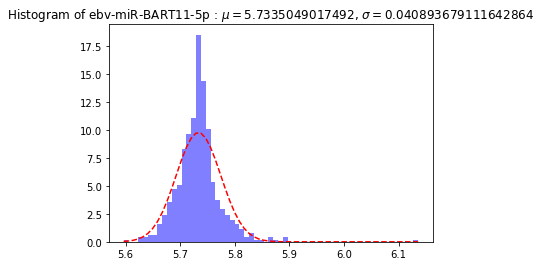

In [85]:
hist_col("ebv-miR-BART11-5p",miRNA,miRNA_description)

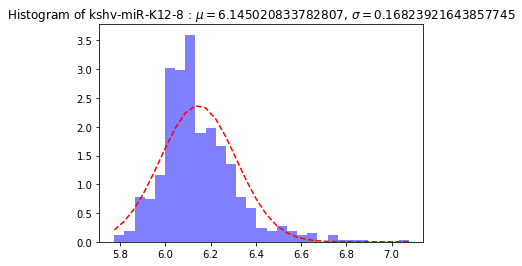

In [86]:
hist_col("kshv-miR-K12-8",miRNA,miRNA_description)

In [87]:
miRNA.size-np.isfinite(miRNA).sum().sum()

0

In [88]:
result=0
for each in miRNA.index.tolist():
    if each in mRNAArray.index.tolist():
        result=result+1
result

529

In [89]:
#miRNA targets were obtained from the R package: https://bioconductor.org/packages/release/bioc/vignettes/multiMiR/inst/doc/multiMiR.html#71_example_1:_retrieve_all_validated_target_genes_of_a_given_mirna
#using only experimentally validated interactions

In [90]:
a=pd.read_csv(folder_Firebrowse_GBM+"miRNA_targets_GBM_Firebrowse.csv",header=None, sep =",")
flat_list = [item for sublist in a.values.tolist() for item in sublist]
miRNA_targets=set(flat_list)

In [91]:
len(miRNA_targets)

341

In [92]:
#We found 341 different targets of the miRNA from the GBM Firebrowse dataset

In [93]:
ind=list(miRNA_targets)
ind=Verhaak.index.tolist()
miRNA_Verhaak=mRNAArray.loc[ind,col]
miRNA_Verhaak=miRNA_Verhaak.dropna(axis=1)


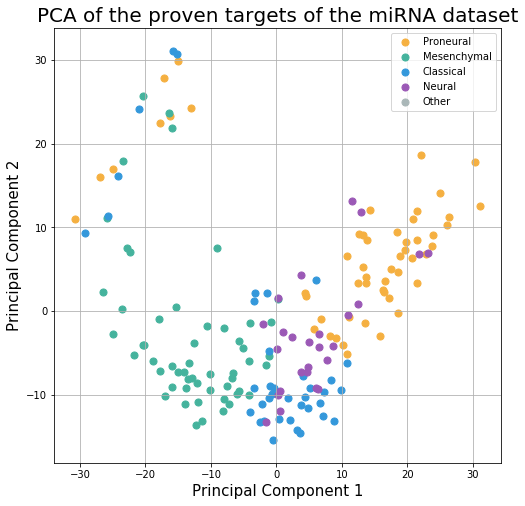

In [94]:
#Code to mark the samples in mRNAArray as one of the four subclasses of GBM or as other
result=list()
for i in miRNA_Verhaak.index.tolist():
    if i in labels["Hybridization REF"].tolist():
        index=labels["Hybridization REF"].tolist().index(i)
        result.append(labels.loc[index,"Subtype"])
    else:
        result.append("Other")
result=pd.DataFrame(result,columns=["target"])
result.head()

#Code to build the PCA plot
pca = decomposition.PCA(n_components=2)
PC = pca.fit_transform(miRNA_Verhaak.values)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets=["Proneural","Mesenchymal","Classical","Neural","Other"]
colors = ["#F5B041", '#45B39D', '#3498DB',"#9B59B6","#AAB7B8"]
ax.set_title('PCA of the proven targets of the miRNA dataset', fontsize = 20)
for target,color in zip(targets,colors):
    indicesToKeep = result['target'] == target
    ax.scatter(PC[indicesToKeep,0]
               , PC[indicesToKeep,1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid() 

## Methylation

In [95]:
Methylation= pd.read_csv(folder_Firebrowse_GBM+'gdac.broadinstitute.org_GBM.Merge_methylation__humanmethylation27__jhu_usc_edu__Level_3__within_bioassay_data_set_function__data.Level_3.2016012800.0.0.csv', sep=",",header=0,index_col=0)
Methylation=Methylation.drop(columns=["Gene_Symbol","Chromosome","Genomic_Coordinate"])
Methylation=Methylation.transpose()
Methylation=Methylation.apply(pd.to_numeric)
Methylation.tail()

,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,cg00011459,cg00012199,cg00012386,cg00012792,cg00013618,cg00014085,cg00014837,cg00015770,cg00016968,cg00019495,cg00020533,cg00021527,cg00022606,cg00022866,cg00024396,cg00024812,cg00025138,cg00025991,cg00027083,cg00027674,cg00029826,cg00029931,cg00030047,cg00031162,cg00032227,cg00032666,cg00033516,cg00033773,cg00034039,cg00035347,cg00035623,cg00037763,cg00037940,cg00040861,cg00040873,cg00041575,cg00042156,cg00043004,cg00043080,cg00044245,cg00044729,cg00047050,cg00047469,cg00049986,cg00050312,cg00051623,cg00051979,cg00053292,cg00053647,cg00054706,cg00055233,cg00056767,cg00057593,cg00058938,cg00059225,cg00059424,cg00059740,cg00059930,cg00060762,cg00060882,cg00061059,cg00061629,cg00062776,cg00063144,cg00065385,cg00065408,cg00066153,cg00066816,cg00067471,cg00069261,cg00071250,cg00071998,cg00072216,cg00073650,cg00075967,cg00076645,cg00077457,cg00077877,cg00078194,cg00078867,cg00079056,cg00079563,cg00080012,cg00081935,cg00081975,cg00083720,cg00083937,cg00084687,cg00089071,cg00090147,cg00091693,cg00093177,cg00094319,cg00094851,cg00095526,cg00095674,cg00096922,cg00097536,cg00098162,cg00098239,cg00099550,cg00101227,cg00103783,cg00105253,cg00105470,cg00107187,cg00107488,cg00107632,cg00108454,cg00109274,cg00112517,cg00113020,cg00113951,cg00115714,cg00116234,cg00116838,cg00117172,cg00119079,cg00121158,cg00121640,cg00121904,cg00123035,cg00126034,cg00126657,cg00126698,cg00128197,cg00128560,cg00128654,cg00128766,cg00128877,cg00129774,cg00131121,cg00131557,cg00132141,cg00133909,cg00134539,cg00134787,cg00135056,cg00135393,cg00136105,cg00136405,cg00136477,cg00136736,cg00138126,cg00141162,cg00141550,cg00141845,cg00143376,cg00143998,cg00145118,cg00145348,cg00146096,cg00149659,cg00149976,cg00151234,cg00151607,cg00152644,cg00155167,cg00155485,cg00155609,cg00156216,cg00156744,cg00158308,cg00160914,cg00162401,cg00162643,cg00164041,cg00164898,cg00165981,cg00167504,cg00168082,cg00168785,cg00168942,cg00169548,cg00171126,cg00171161,cg00174500,cg00174901,cg00176210,cg00176879,cg00177013,cg00177698,cg00177923,cg00178790,cg00179446,cg00180012,cg00180631,cg00182461,cg00183782,cg00183916,cg00184884,cg00184893,cg00185103,cg00185839,cg00186141,cg00186701,cg00186954,cg00187380,cg00187686,cg00188348,cg00191052,cg00194146,cg00195561,cg00197381,cg00197641,cg00199549,cg00200063,cg00201234,cg00202702,cg00202711,cg00204262,cg00206052,cg00207534,cg00208830,cg00208967,cg00209066,cg00209951,cg00210842,cg00211661,cg00212549,cg00213044,cg00213331,cg00213714,cg00214346,cg00214794,cg00214855,cg00215066,cg00216361,cg00216758,cg00217795,cg00221494,cg00223186,cg00223950,cg00224234,cg00224508,cg00226904,cg00226923,cg00228799,cg00229387,cg00230271,...,cg27394046,cg27394486,cg27394563,cg27394566,cg27395450,cg27397287,cg27398499,cg27398547,cg27400772,cg27401095,cg27402949,cg27403635,cg27403822,cg27404050,cg27406727,cg27409012,cg27409364,cg27412093,cg27412902,cg27413025,cg27413508,cg27413543,cg27416067,cg27416437,cg27417997,cg27418851,cg27419217,cg27420123,cg27420236,cg27425193,cg27425675,cg27426707,cg27427207,cg27429194,cg27431150,cg27431247,cg27431396,cg27431859,cg27433062,cg27433088,cg27436184,cg27437944,cg27440002,cg27440834,cg27441551,cg27442349,cg27443050,cg27443224,cg27444994,cg27445265,cg27446185,cg27446233,cg27447599,cg27447740,cg27449489,cg27449959,cg27453644,cg27456885,cg27457941,cg27458888,cg27459381,cg27460755,cg27461196,cg27462160,cg27462371,cg27462398,cg27462969,cg27464755,cg27465531,cg27465566,cg27465569,cg27465849,cg27465858,cg27467734,cg27470406,cg27470554,cg27472032,cg27472295,cg27475152,cg27476329,cg27477205,cg27477594,cg27477990,cg27478651,cg27478659,cg27480700,cg27485235,cg27485921,cg27486427,cg27488807,cg27489994,cg27490193,cg27491887,cg27493997,cg27494383,cg27495845,cg27495908,cg27496506,cg27497687,cg27497781,cg27497900,cg27498304,cg27501380,cg27501458,cg27504117,cg27504299,cg27504805,cg27504991,cg27505538,cg27507704,cg27508002,cg27508071,cg27508821,cg

In [96]:
Methylation.shape

(285, 27578)

In [97]:
Methylation_description=Methylation.describe()
Methylation_description.head(10)

,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414,cg00007981,cg00008493,cg00008713,cg00009407,cg00010193,cg00011459,cg00012199,cg00012386,cg00012792,cg00013618,cg00014085,cg00014837,cg00015770,cg00016968,cg00019495,cg00020533,cg00021527,cg00022606,cg00022866,cg00024396,cg00024812,cg00025138,cg00025991,cg00027083,cg00027674,cg00029826,cg00029931,cg00030047,cg00031162,cg00032227,cg00032666,cg00033516,cg00033773,cg00034039,cg00035347,cg00035623,cg00037763,cg00037940,cg00040861,cg00040873,cg00041575,cg00042156,cg00043004,cg00043080,cg00044245,cg00044729,cg00047050,cg00047469,cg00049986,cg00050312,cg00051623,cg00051979,cg00053292,cg00053647,cg00054706,cg00055233,cg00056767,cg00057593,cg00058938,cg00059225,cg00059424,cg00059740,cg00059930,cg00060762,cg00060882,cg00061059,cg00061629,cg00062776,cg00063144,cg00065385,cg00065408,cg00066153,cg00066816,cg00067471,cg00069261,cg00071250,cg00071998,cg00072216,cg00073650,cg00075967,cg00076645,cg00077457,cg00077877,cg00078194,cg00078867,cg00079056,cg00079563,cg00080012,cg00081935,cg00081975,cg00083720,cg00083937,cg00084687,cg00089071,cg00090147,cg00091693,cg00093177,cg00094319,cg00094851,cg00095526,cg00095674,cg00096922,cg00097536,cg00098162,cg00098239,cg00099550,cg00101227,cg00103783,cg00105253,cg00105470,cg00107187,cg00107488,cg00107632,cg00108454,cg00109274,cg00112517,cg00113020,cg00113951,cg00115714,cg00116234,cg00116838,cg00117172,cg00119079,cg00121158,cg00121640,cg00121904,cg00123035,cg00126034,cg00126657,cg00126698,cg00128197,cg00128560,cg00128654,cg00128766,cg00128877,cg00129774,cg00131121,cg00131557,cg00132141,cg00133909,cg00134539,cg00134787,cg00135056,cg00135393,cg00136105,cg00136405,cg00136477,cg00136736,cg00138126,cg00141162,cg00141550,cg00141845,cg00143376,cg00143998,cg00145118,cg00145348,cg00146096,cg00149659,cg00149976,cg00151234,cg00151607,cg00152644,cg00155167,cg00155485,cg00155609,cg00156216,cg00156744,cg00158308,cg00160914,cg00162401,cg00162643,cg00164041,cg00164898,cg00165981,cg00167504,cg00168082,cg00168785,cg00168942,cg00169548,cg00171126,cg00171161,cg00174500,cg00174901,cg00176210,cg00176879,cg00177013,cg00177698,cg00177923,cg00178790,cg00179446,cg00180012,cg00180631,cg00182461,cg00183782,cg00183916,cg00184884,cg00184893,cg00185103,cg00185839,cg00186141,cg00186701,cg00186954,cg00187380,cg00187686,cg00188348,cg00191052,cg00194146,cg00195561,cg00197381,cg00197641,cg00199549,cg00200063,cg00201234,cg00202702,cg00202711,cg00204262,cg00206052,cg00207534,cg00208830,cg00208967,cg00209066,cg00209951,cg00210842,cg00211661,cg00212549,cg00213044,cg00213331,cg00213714,cg00214346,cg00214794,cg00214855,cg00215066,cg00216361,cg00216758,cg00217795,cg00221494,cg00223186,cg00223950,cg00224234,cg00224508,cg00226904,cg00226923,cg00228799,cg00229387,cg00230271,...,cg27394046,cg27394486,cg27394563,cg27394566,cg27395450,cg27397287,cg27398499,cg27398547,cg27400772,cg27401095,cg27402949,cg27403635,cg27403822,cg27404050,cg27406727,cg27409012,cg27409364,cg27412093,cg27412902,cg27413025,cg27413508,cg27413543,cg27416067,cg27416437,cg27417997,cg27418851,cg27419217,cg27420123,cg27420236,cg27425193,cg27425675,cg27426707,cg27427207,cg27429194,cg27431150,cg27431247,cg27431396,cg27431859,cg27433062,cg27433088,cg27436184,cg27437944,cg27440002,cg27440834,cg27441551,cg27442349,cg27443050,cg27443224,cg27444994,cg27445265,cg27446185,cg27446233,cg27447599,cg27447740,cg27449489,cg27449959,cg27453644,cg27456885,cg27457941,cg27458888,cg27459381,cg27460755,cg27461196,cg27462160,cg27462371,cg27462398,cg27462969,cg27464755,cg27465531,cg27465566,cg27465569,cg27465849,cg27465858,cg27467734,cg27470406,cg27470554,cg27472032,cg27472295,cg27475152,cg27476329,cg27477205,cg27477594,cg27477990,cg27478651,cg27478659,cg27480700,cg27485235,cg27485921,cg27486427,cg27488807,cg27489994,cg27490193,cg27491887,cg27493997,cg27494383,cg27495845,cg27495908,cg27496506,cg27497687,cg27497781,cg27497900,cg27498304,cg27501380,cg27501458,cg27504117,cg27504299,cg27504805,cg27504991,cg27505538,cg27507704,cg27508002,cg27508071,cg27508821,cg

In [98]:
(Methylation.size-Methylation.isnull().sum().sum())/Methylation.size

0.9041755887288749

In [99]:
#Many Columns entries are null! (710.000 aprox), which is 90% approx

## CopyNumber

In [100]:
#GISTIC:all_data_by_genes.txt output data. This data is a gene-level table of copy number values for all samples. 
#The returned copy number values are in units (copy number - 2) so that no amplification or deletion is 0, genes 
#with amplifications have positive values, and genes with deletions are negative values. The data are converted 
#from marker level to gene level using the extreme method: a gene is assigned the greatest amplification or the 
#least deletion value among the markers it covers. Results may be filtered by cohort, gene, or barcode, but at 
#least one gene or barcode must be supplied.
#Other datasets available are: Threshold(no amplification or deletion above a certain thershold) and Peaks

Genomic Identification of Significant Targets in Cancer (GISTIC), for identifying regions of aberration that are more likely to drive cancer pathogenesis. The method identifies those regions of the genome that are aberrant more often than would be expected by chance, with greater weight given to high-amplitude events (high-level copy-number gains or homozygous deletions) that are less likely to represent random aberrations.

In [101]:
CopyNumber= pd.read_csv(folder_Firebrowse_GBM+'GISTIC_AllByGene.csv', sep=",",header=0,index_col=1)
CopyNumber=CopyNumber.drop(columns=["Locus.ID","Cytoband","Unnamed: 0"])
CopyNumber.head()
CopyNumber=CopyNumber.transpose()
new_index=pd.Series([w.replace(".","-") for w in CopyNumber.index.tolist()])
CopyNumber.set_index(new_index,inplace=True)
CopyNumber=CopyNumber.apply(pd.to_numeric)
CopyNumber.index=CopyNumber.index.map(chop)
CopyNumber.head()

Gene.Symbol,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,C1orf170,C1orf222,C1orf233,C1orf86,CALML6,CCNL2,CDK11A,CDK11B,CPSF3L,DDX11L1,DVL1,FAM132A,FAM138A,FAM213B,FAM41C,FAM87B,GABRD,GLTPD1,GNB1,HES4,HES5,ISG15,KLHL17,LINC00115,LINC00982,MIB2,MIR200A,MIR200B,MIR429,MMEL1,MMP23B,MORN1,MRPL20,MXRA8,NADK,NOC2L,OR4F16,OR4F29,OR4F5,PANK4,PEX10,PLCH2,PLEKHN1,PRDM16,PRKCZ,PUSL1,RER1,RN7SL657P,RNF223,SAMD11,SCNN1D,SDF4,SKI,SLC35E2B,SLC35E2,SSU72,TAS1R3,TMEM240,TMEM52,TMEM88B,TNFRSF14,TNFRSF18,TNFRSF4,TTC34,TTLL10,UBE2J2,VWA1,ARHGEF16,MEGF6,MIR551A,TPRG1L,WRAP73,TP73,CCDC27,SMIM1,LRRC47,RN7SL574P,CEP104,DFFB,C1orf174,AJAP1,MIR4417,MIR4689,NPHP4,KCNAB2,CHD5,RPL22,RNF207,ICMT,LINC00337,GPR153,HES3,ACOT7,HES2,ESPN,MIR4252,PLEKHG5,TNFRSF25,NOL9,TAS1R1,ZBTB48,KLHL21,PHF13,THAP3,DNAJC11,snoU13|ENSG00000239166.1,CAMTA1,VAMP3,PER3,UTS2,TNFRSF9,PARK7,ERRFI1,RN7SL729P,SLC45A1,RERE,SNORA77|ENSG00000221083.1,ENO1,CA6,RN7SL451P,SLC2A7,SLC2A5,SCARNA16|ENSG00000252404.1,GPR157,MIR34A,H6PD,SPSB1,RNA5SP40,SLC25A33,TMEM201,C1orf200,PIK3CD,CLSTN1,CTNNBIP1,LZIC,NMNAT1,RN7SKP269,MIR5697,RBP7,UBE4B,KIF1B,MIR1273D,RN7SL731P,RN7SL721P,PGD,APITD1,CORT,DFFA,PEX14,RN7SL614P,CASZ1,C1orf127,TARDBP,MASP2,SRM,EXOSC10,MTOR,snoU13|ENSG00000271794.1,ANGPTL7,UBIAD1,PTCHD2,FBXO2,FBXO44,FBXO6,MAD2L2,DRAXIN,AGTRAP,C1orf167,MTHFR,CLCN6,NPPA,NPPB,KIAA2013,PLOD1,MFN2,MIIP,RN7SL649P,TNFRSF8,TNFRSF1B,MIR4632,SNORA70|ENSG00000252969.1,VPS13D,SNORA59A,DHRS3,RNU6ATAC18P,AADACL4,AADACL3,snoU13|ENSG00000238771.1,C1orf158,HNRNPCL1,PRAMEF10,PRAMEF11,PRAMEF12,PRAMEF13,PRAMEF14,PRAMEF15,PRAMEF16,PRAMEF17,PRAMEF18,PRAMEF19,PRAMEF1,PRAMEF21,PRAMEF22,PRAMEF2,PRAMEF3,PRAMEF4,PRAMEF5,PRAMEF6,PRAMEF7,PRAMEF8,PRAMEF9,PRAMEF20,LRRC38,PDPN,RNA5SP41,SCARNA11|ENSG00000253085.1,PRDM2,KAZN,TMEM51,C1orf195,FHAD1,EFHD2,CTRC,CELA2A,CELA2B,CASP9,DNAJC16,SCARNA21|ENSG00000251866.1,AGMAT,DDI2,RSC1A1,PLEKHM2,FBLIM1,SLC25A34,TMEM82,SPEN,snoU13|ENSG00000238818.1,ZBTB17,C1orf64,HSPB7,...,MIR450B,MIR503HG,MIR542,MIR503,LINC00629,PLAC1,FAM122B,FAM122C,MOSPD1,SMIM10,FAM127C,FAM127A,FAM127B,LINC00087,LINC00633,CT45A1,CT45A2,CT45A3,CT45A4,CT45A5,CT45A6,CXorf48,DDX26B,LINC00086,RNA5SP515,SAGE1,ZNF449,ZNF75D,MMGT1,SLC9A6,snoU13|ENSG00000239080.1,FHL1,MAP7D3,GPR112,BRS3,HTATSF1,VGLL1,MIR934,LINC00892,CD40LG,ARHGEF6,RBMX,SNORD61|ENSG00000206979.1,GPR101,ZIC3,RN7SL325P,RN7SKP31,FGF13,MIR504,F9,MCF2,ATP11C,CXorf66,MIR505,RN7SL727P,RNU6ATAC23P,SNORA18|ENSG00000252719.1,snoU13|ENSG00000238485.1,SOX3,LINC00632,CDR1,MIR320D2,SPANXB1,SPANXB2,LDOC1,MAGEC1,MAGEC3,SPANXA1,SPANXA2,SPANXC,SPANXD,MAGEC2,RNA5SP516,snoU13|ENSG00000239188.1,SPANXN4,RN7SKP81,RN7SKP149,SPANXN3,SLITRK4,SPANXN2,UBE2NL,RN7SKP189,SPANXN1,SLITRK2,TMEM257,MIR888,MIR890,MIR892A,MIR892B,MIR891B,MIR891A,RNA5SP517,CXorf51A,CXorf51B,MIR513C,MIR513B,MIR513A1,MIR513A2,MIR506,MIR507,MIR508,MIR514B,MIR510,MIR514A1,MIR514A2,MIR514A3,FMR1,FMR1NB,AFF2,RN7SKP267,IDS,LINC00893,CXorf40A,CXorf40B,HSFX1,HSFX2,LINC00894,MAGEA11,MAGEA8,MAGEA9B,MAGEA9,TMEM185A,MIR2114,MAMLD1,MTM1,MTMR1,CD99L2,U3|ENSG00000253009.1,HMGB3,MIR4330,GPR50,VMA21,PASD1,PRRG3,FATE1,CNGA2,MAGEA4,GABRE,MIR224,MIR452,MAGEA10,GABRA3,MIR767,GABRQ,CETN2,CSAG1,CSAG2,CSAG3,CSAG4,MAGEA12,MAGEA1,MAGEA2B,MAGEA2,MAGEA3,MAGEA6,NSDHL,PNMA3,PNMA5,PNMA6A,PNMA6B,PNMA6C,PNMA6D,RN7SL190P,RN7SL667P,ZFP92,ZNF185,ZNF275,snoU13|ENSG00000239037.1,HAUS7,TREX2,BGN,ATP2B3,FAM58A,DUSP9,RN7SL687P,PNCK,SLC6A8,BCAP31,ABCD1,PLXNB3,IDH3G,SRPK3,SSR4,PDZD4,SNORD36|ENSG00000251846.1,L1CAM,LCA10,AVPR2,ARHGAP4,NAA10,HCFC1,RENBP,TMEM187,IRAK1,MECP2,MIR718,OPN1LW,OPN1MW2,OPN1MW,TEX28P1,TEX28P2,TEX28,TKTL1,EMD,FLNA,RPL10,SNORA70|ENSG00000207165.1,DNASE1L1,TAZ,ATP6AP1,FAM50A,GDI1,PLXNA3,LAGE3,UBL4A,SLC10A3,RN7SL697P,RN7SL742P,FAM3A,G6PD,IKBKG,BRCC3,CLIC2,CMC4,CTAG1A,CTAG1B,CTAG2,DKC1,F8A1,F8A2,F8A3,F8,FUNDC2,GAB3,H2AFB1,H2AFB2,H2AFB3,MPP1,MTCP1,RAB39B,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-02-00

In [102]:
CopyNumber.shape

(577, 24776)

In [103]:
CopyNumber_description=CopyNumber.describe()
CopyNumber_description.head(10)

Gene.Symbol,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,C1orf170,C1orf222,C1orf233,C1orf86,CALML6,CCNL2,CDK11A,CDK11B,CPSF3L,DDX11L1,DVL1,FAM132A,FAM138A,FAM213B,FAM41C,FAM87B,GABRD,GLTPD1,GNB1,HES4,HES5,ISG15,KLHL17,LINC00115,LINC00982,MIB2,MIR200A,MIR200B,MIR429,MMEL1,MMP23B,MORN1,MRPL20,MXRA8,NADK,NOC2L,OR4F16,OR4F29,OR4F5,PANK4,PEX10,PLCH2,PLEKHN1,PRDM16,PRKCZ,PUSL1,RER1,RN7SL657P,RNF223,SAMD11,SCNN1D,SDF4,SKI,SLC35E2B,SLC35E2,SSU72,TAS1R3,TMEM240,TMEM52,TMEM88B,TNFRSF14,TNFRSF18,TNFRSF4,TTC34,TTLL10,UBE2J2,VWA1,ARHGEF16,MEGF6,MIR551A,TPRG1L,WRAP73,TP73,CCDC27,SMIM1,LRRC47,RN7SL574P,CEP104,DFFB,C1orf174,AJAP1,MIR4417,MIR4689,NPHP4,KCNAB2,CHD5,RPL22,RNF207,ICMT,LINC00337,GPR153,HES3,ACOT7,HES2,ESPN,MIR4252,PLEKHG5,TNFRSF25,NOL9,TAS1R1,ZBTB48,KLHL21,PHF13,THAP3,DNAJC11,snoU13|ENSG00000239166.1,CAMTA1,VAMP3,PER3,UTS2,TNFRSF9,PARK7,ERRFI1,RN7SL729P,SLC45A1,RERE,SNORA77|ENSG00000221083.1,ENO1,CA6,RN7SL451P,SLC2A7,SLC2A5,SCARNA16|ENSG00000252404.1,GPR157,MIR34A,H6PD,SPSB1,RNA5SP40,SLC25A33,TMEM201,C1orf200,PIK3CD,CLSTN1,CTNNBIP1,LZIC,NMNAT1,RN7SKP269,MIR5697,RBP7,UBE4B,KIF1B,MIR1273D,RN7SL731P,RN7SL721P,PGD,APITD1,CORT,DFFA,PEX14,RN7SL614P,CASZ1,C1orf127,TARDBP,MASP2,SRM,EXOSC10,MTOR,snoU13|ENSG00000271794.1,ANGPTL7,UBIAD1,PTCHD2,FBXO2,FBXO44,FBXO6,MAD2L2,DRAXIN,AGTRAP,C1orf167,MTHFR,CLCN6,NPPA,NPPB,KIAA2013,PLOD1,MFN2,MIIP,RN7SL649P,TNFRSF8,TNFRSF1B,MIR4632,SNORA70|ENSG00000252969.1,VPS13D,SNORA59A,DHRS3,RNU6ATAC18P,AADACL4,AADACL3,snoU13|ENSG00000238771.1,C1orf158,HNRNPCL1,PRAMEF10,PRAMEF11,PRAMEF12,PRAMEF13,PRAMEF14,PRAMEF15,PRAMEF16,PRAMEF17,PRAMEF18,PRAMEF19,PRAMEF1,PRAMEF21,PRAMEF22,PRAMEF2,PRAMEF3,PRAMEF4,PRAMEF5,PRAMEF6,PRAMEF7,PRAMEF8,PRAMEF9,PRAMEF20,LRRC38,PDPN,RNA5SP41,SCARNA11|ENSG00000253085.1,PRDM2,KAZN,TMEM51,C1orf195,FHAD1,EFHD2,CTRC,CELA2A,CELA2B,CASP9,DNAJC16,SCARNA21|ENSG00000251866.1,AGMAT,DDI2,RSC1A1,PLEKHM2,FBLIM1,SLC25A34,TMEM82,SPEN,snoU13|ENSG00000238818.1,ZBTB17,C1orf64,HSPB7,...,MIR450B,MIR503HG,MIR542,MIR503,LINC00629,PLAC1,FAM122B,FAM122C,MOSPD1,SMIM10,FAM127C,FAM127A,FAM127B,LINC00087,LINC00633,CT45A1,CT45A2,CT45A3,CT45A4,CT45A5,CT45A6,CXorf48,DDX26B,LINC00086,RNA5SP515,SAGE1,ZNF449,ZNF75D,MMGT1,SLC9A6,snoU13|ENSG00000239080.1,FHL1,MAP7D3,GPR112,BRS3,HTATSF1,VGLL1,MIR934,LINC00892,CD40LG,ARHGEF6,RBMX,SNORD61|ENSG00000206979.1,GPR101,ZIC3,RN7SL325P,RN7SKP31,FGF13,MIR504,F9,MCF2,ATP11C,CXorf66,MIR505,RN7SL727P,RNU6ATAC23P,SNORA18|ENSG00000252719.1,snoU13|ENSG00000238485.1,SOX3,LINC00632,CDR1,MIR320D2,SPANXB1,SPANXB2,LDOC1,MAGEC1,MAGEC3,SPANXA1,SPANXA2,SPANXC,SPANXD,MAGEC2,RNA5SP516,snoU13|ENSG00000239188.1,SPANXN4,RN7SKP81,RN7SKP149,SPANXN3,SLITRK4,SPANXN2,UBE2NL,RN7SKP189,SPANXN1,SLITRK2,TMEM257,MIR888,MIR890,MIR892A,MIR892B,MIR891B,MIR891A,RNA5SP517,CXorf51A,CXorf51B,MIR513C,MIR513B,MIR513A1,MIR513A2,MIR506,MIR507,MIR508,MIR514B,MIR510,MIR514A1,MIR514A2,MIR514A3,FMR1,FMR1NB,AFF2,RN7SKP267,IDS,LINC00893,CXorf40A,CXorf40B,HSFX1,HSFX2,LINC00894,MAGEA11,MAGEA8,MAGEA9B,MAGEA9,TMEM185A,MIR2114,MAMLD1,MTM1,MTMR1,CD99L2,U3|ENSG00000253009.1,HMGB3,MIR4330,GPR50,VMA21,PASD1,PRRG3,FATE1,CNGA2,MAGEA4,GABRE,MIR224,MIR452,MAGEA10,GABRA3,MIR767,GABRQ,CETN2,CSAG1,CSAG2,CSAG3,CSAG4,MAGEA12,MAGEA1,MAGEA2B,MAGEA2,MAGEA3,MAGEA6,NSDHL,PNMA3,PNMA5,PNMA6A,PNMA6B,PNMA6C,PNMA6D,RN7SL190P,RN7SL667P,ZFP92,ZNF185,ZNF275,snoU13|ENSG00000239037.1,HAUS7,TREX2,BGN,ATP2B3,FAM58A,DUSP9,RN7SL687P,PNCK,SLC6A8,BCAP31,ABCD1,PLXNB3,IDH3G,SRPK3,SSR4,PDZD4,SNORD36|ENSG00000251846.1,L1CAM,LCA10,AVPR2,ARHGAP4,NAA10,HCFC1,RENBP,TMEM187,IRAK1,MECP2,MIR718,OPN1LW,OPN1MW2,OPN1MW,TEX28P1,TEX28P2,TEX28,TKTL1,EMD,FLNA,RPL10,SNORA70|ENSG00000207165.1,DNASE1L1,TAZ,ATP6AP1,FAM50A,GDI1,PLXNA3,LAGE3,UBL4A,SLC10A3,RN7SL697P,RN7SL742P,FAM3A,G6PD,IKBKG,BRCC3,CLIC2,CMC4,CTAG1A,CTAG1B,CTAG2,DKC1,F8A1,F8A2,F8A3,F8,FUNDC2,GAB3,H2AFB1,H2AFB2,H2AFB3,MPP1,MTCP1,RAB39B,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
count,577.

In [104]:
#It seems like none of the Verhaak samples are in this dataset

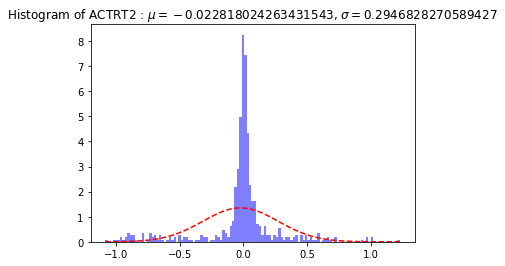

In [105]:
hist_col("ACTRT2",CopyNumber,CopyNumber_description)

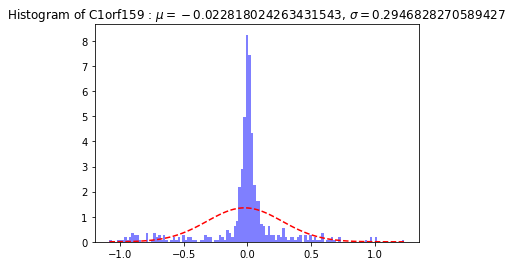

In [106]:
hist_col("C1orf159",CopyNumber,CopyNumber_description)

## RNASeq Data

In [107]:
#This data I couldn't obtain directly from RTCGA, so I downloaded it from here:http://firebrowse.org/?cohort=GBM

In [110]:
RNASeq=pd.read_csv(folder_Firebrowse_GBM+'GBM.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt', sep="\t",header=0,index_col=0)
RNASeq=RNASeq.drop(index="gene_id")
RNASeq=RNASeq.apply(pd.to_numeric)
RNASeq=RNASeq.transpose()
RNASeq.head()

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,AARS2|57505,AARSD1|80755,AARS|16,AASDHPPT|60496,AASDH|132949,AASS|10157,AATF|26574,AATK|9625,ABAT|18,ABCA10|10349,ABCA11P|79963,ABCA12|26154,ABCA13|154664,ABCA17P|650655,ABCA1|19,ABCA2|20,ABCA3|21,ABCA4|24,ABCA5|23461,ABCA6|23460,ABCA7|10347,ABCA8|10351,ABCA9|10350,ABCB10|23456,ABCB11|8647,ABCB1|5243,ABCB4|5244,ABCB5|340273,ABCB6|10058,ABCB7|22,ABCB8|11194,ABCB9|23457,ABCC10|89845,ABCC11|85320,ABCC12|94160,ABCC13|150000,ABCC1|4363,ABCC2|1244,ABCC3|8714,ABCC4|10257,ABCC5|10057,ABCC6P1|653190,ABCC6P2|730013,ABCC6|368,ABCC8|6833,ABCC9|10060,ABCD1|215,ABCD2|225,ABCD3|5825,ABCD4|5826,ABCE1|6059,ABCF1|23,ABCF2|10061,ABCF3|55324,ABCG1|9619,ABCG2|9429,ABCG4|64137,ABCG5|64240,ABCG8|64241,ABHD10|55347,ABHD11|83451,ABHD12B|145447,ABHD12|26090,ABHD13|84945,ABHD14A|25864,ABHD14B|84836,ABHD15|116236,ABHD1|84696,ABHD2|11057,ABHD3|171586,ABHD4|63874,ABHD5|51099,ABHD6|57406,ABHD8|79575,ABI1|10006,ABI2|10152,ABI3BP|25890,ABI3|51225,ABL1|25,ABL2|27,ABLIM1|3983,ABLIM2|84448,ABLIM3|22885,ABO|28,ABP1|26,ABRA|137735,ABR|29,ABT1|29777,ABTB1|80325,ABTB2|25841,ACAA1|30,ACAA2|10449,ACACA|31,ACACB|32,ACAD10|80724,ACAD11|84129,ACAD8|27034,ACAD9|28976,ACADL|33,ACADM|34,ACADSB|36,ACADS|35,ACADVL|37,ACAN|176,ACAP1|9744,ACAP2|23527,ACAP3|116983,ACAT1|38,ACAT2|39,ACBD3|64746,ACBD4|79777,ACBD5|91452,ACBD6|84320,ACBD7|414149,ACCN1|40,ACCN2|41,ACCN3|9311,ACCN4|55515,ACCN5|51802,ACCSL|390110,ACCS|84680,ACD|65057,ACE2|59272,ACER1|125981,ACER2|340485,ACER3|55331,ACE|1636,ACHE|43,ACIN1|22985,ACLY|47,ACMSD|130013,ACN9|57001,ACO1|48,ACO2|50,ACOT11|26027,ACOT12|134526,ACOT13|55856,ACOT1|641371,ACOT2|10965,ACOT4|122970,ACOT6|641372,ACOT7|11332,ACOT8|10005,ACOT9|23597,ACOX1|51,ACOX2|8309,ACOX3|8310,ACOXL|55289,ACP1|52,ACP2|53,ACP5|54,ACP6|51205,ACPL2|92370,ACPP|55,ACPT|93650,ACRBP|84519,ACRC|93953,ACRV1|56,ACR|49,ACSBG1|23205,ACSBG2|81616,ACSF2|80221,ACSF3|197322,ACSL1|2180,ACSL3|2181,ACSL4|2182,ACSL5|51703,ACSL6|23305,ACSM1|116285,ACSM2A|123876,ACSM2B|348158,ACSM3|6296,ACSM4|341392,ACSM5|54988,ACSS1|84532,ACSS2|55902,ACSS3|79611,ACTA1|58,ACTA2|59,ACTBL2|345651,ACTB|60,ACTC1|70,ACTG1|71,ACTG2|72,ACTL6A|86,ACTL6B|51412,ACTL7A|10881,ACTL7B|10880,ACTL8|81569,ACTL9|284382,ACTN1|87,ACTN2|88,ACTN3|89,ACTN4|81,ACTR10|55860,ACTR1A|10121,ACTR1B|10120,ACTR2|10097,ACTR3B|57180,ACTR3C|653857,...,ZNF596|169270,ZNF597|146434,ZNF598|90850,ZNF599|148103,ZNF600|162966,ZNF605|100289635,ZNF606|80095,ZNF607|84775,ZNF608|57507,ZNF609|23060,ZNF610|162963,ZNF611|81856,ZNF613|79898,ZNF614|80110,ZNF615|284370,ZNF616|90317,ZNF618|114991,ZNF619|285267,ZNF620|253639,ZNF621|285268,ZNF622|90441,ZNF623|9831,ZNF624|57547,ZNF625|90589,ZNF626|199777,ZNF627|199692,ZNF628|89887,ZNF629|23361,ZNF630|57232,ZNF638|27332,ZNF639|51193,ZNF641|121274,ZNF642|339559,ZNF643|65243,ZNF644|84146,ZNF645|158506,ZNF646|9726,ZNF648|127665,ZNF649|65251,ZNF652|22834,ZNF653|115950,ZNF654|55279,ZNF655|79027,ZNF658|26149,ZNF660|285349,ZNF662|389114,ZNF664|144348,ZNF665|79788,ZNF667|63934,ZNF668|79759,ZNF669|79862,ZNF670|93474,ZNF671|79891,ZNF672|79894,ZNF673|55634,ZNF674|641339,ZNF675|171392,ZNF676|163223,ZNF677|342926,ZNF678|339500,ZNF679|168417,ZNF680|340252,ZNF681|148213,ZNF682|91120,ZNF683|257101,ZNF684|127396,ZNF687|57592,ZNF688|146542,ZNF689|115509,ZNF691|51058,ZNF692|55657,ZNF695|57116,ZNF696|79943,ZNF697|90874,ZNF699|374879,ZNF69|7620,ZNF700|90592,ZNF701|55762,ZNF702P|79986,ZNF703|80139,ZNF704|619279,ZNF705A|440077,ZNF705D|728957,ZNF706|51123,ZNF707|286075,ZNF708|7562,ZNF709|163051,ZNF70|7621,ZNF710|374655,ZNF711

In [111]:
RNASeq.shape

(171, 20531)

In [112]:
RNASeq_description=RNASeq.describe()
RNASeq_description.head(9)

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACSL|729522,AACS|65985,AADACL2|344752,AADACL3|126767,AADACL4|343066,AADAC|13,AADAT|51166,AAGAB|79719,AAK1|22848,AAMP|14,AANAT|15,AARS2|57505,AARSD1|80755,AARS|16,AASDHPPT|60496,AASDH|132949,AASS|10157,AATF|26574,AATK|9625,ABAT|18,ABCA10|10349,ABCA11P|79963,ABCA12|26154,ABCA13|154664,ABCA17P|650655,ABCA1|19,ABCA2|20,ABCA3|21,ABCA4|24,ABCA5|23461,ABCA6|23460,ABCA7|10347,ABCA8|10351,ABCA9|10350,ABCB10|23456,ABCB11|8647,ABCB1|5243,ABCB4|5244,ABCB5|340273,ABCB6|10058,ABCB7|22,ABCB8|11194,ABCB9|23457,ABCC10|89845,ABCC11|85320,ABCC12|94160,ABCC13|150000,ABCC1|4363,ABCC2|1244,ABCC3|8714,ABCC4|10257,ABCC5|10057,ABCC6P1|653190,ABCC6P2|730013,ABCC6|368,ABCC8|6833,ABCC9|10060,ABCD1|215,ABCD2|225,ABCD3|5825,ABCD4|5826,ABCE1|6059,ABCF1|23,ABCF2|10061,ABCF3|55324,ABCG1|9619,ABCG2|9429,ABCG4|64137,ABCG5|64240,ABCG8|64241,ABHD10|55347,ABHD11|83451,ABHD12B|145447,ABHD12|26090,ABHD13|84945,ABHD14A|25864,ABHD14B|84836,ABHD15|116236,ABHD1|84696,ABHD2|11057,ABHD3|171586,ABHD4|63874,ABHD5|51099,ABHD6|57406,ABHD8|79575,ABI1|10006,ABI2|10152,ABI3BP|25890,ABI3|51225,ABL1|25,ABL2|27,ABLIM1|3983,ABLIM2|84448,ABLIM3|22885,ABO|28,ABP1|26,ABRA|137735,ABR|29,ABT1|29777,ABTB1|80325,ABTB2|25841,ACAA1|30,ACAA2|10449,ACACA|31,ACACB|32,ACAD10|80724,ACAD11|84129,ACAD8|27034,ACAD9|28976,ACADL|33,ACADM|34,ACADSB|36,ACADS|35,ACADVL|37,ACAN|176,ACAP1|9744,ACAP2|23527,ACAP3|116983,ACAT1|38,ACAT2|39,ACBD3|64746,ACBD4|79777,ACBD5|91452,ACBD6|84320,ACBD7|414149,ACCN1|40,ACCN2|41,ACCN3|9311,ACCN4|55515,ACCN5|51802,ACCSL|390110,ACCS|84680,ACD|65057,ACE2|59272,ACER1|125981,ACER2|340485,ACER3|55331,ACE|1636,ACHE|43,ACIN1|22985,ACLY|47,ACMSD|130013,ACN9|57001,ACO1|48,ACO2|50,ACOT11|26027,ACOT12|134526,ACOT13|55856,ACOT1|641371,ACOT2|10965,ACOT4|122970,ACOT6|641372,ACOT7|11332,ACOT8|10005,ACOT9|23597,ACOX1|51,ACOX2|8309,ACOX3|8310,ACOXL|55289,ACP1|52,ACP2|53,ACP5|54,ACP6|51205,ACPL2|92370,ACPP|55,ACPT|93650,ACRBP|84519,ACRC|93953,ACRV1|56,ACR|49,ACSBG1|23205,ACSBG2|81616,ACSF2|80221,ACSF3|197322,ACSL1|2180,ACSL3|2181,ACSL4|2182,ACSL5|51703,ACSL6|23305,ACSM1|116285,ACSM2A|123876,ACSM2B|348158,ACSM3|6296,ACSM4|341392,ACSM5|54988,ACSS1|84532,ACSS2|55902,ACSS3|79611,ACTA1|58,ACTA2|59,ACTBL2|345651,ACTB|60,ACTC1|70,ACTG1|71,ACTG2|72,ACTL6A|86,ACTL6B|51412,ACTL7A|10881,ACTL7B|10880,ACTL8|81569,ACTL9|284382,ACTN1|87,ACTN2|88,ACTN3|89,ACTN4|81,ACTR10|55860,ACTR1A|10121,ACTR1B|10120,ACTR2|10097,ACTR3B|57180,ACTR3C|653857,...,ZNF596|169270,ZNF597|146434,ZNF598|90850,ZNF599|148103,ZNF600|162966,ZNF605|100289635,ZNF606|80095,ZNF607|84775,ZNF608|57507,ZNF609|23060,ZNF610|162963,ZNF611|81856,ZNF613|79898,ZNF614|80110,ZNF615|284370,ZNF616|90317,ZNF618|114991,ZNF619|285267,ZNF620|253639,ZNF621|285268,ZNF622|90441,ZNF623|9831,ZNF624|57547,ZNF625|90589,ZNF626|199777,ZNF627|199692,ZNF628|89887,ZNF629|23361,ZNF630|57232,ZNF638|27332,ZNF639|51193,ZNF641|121274,ZNF642|339559,ZNF643|65243,ZNF644|84146,ZNF645|158506,ZNF646|9726,ZNF648|127665,ZNF649|65251,ZNF652|22834,ZNF653|115950,ZNF654|55279,ZNF655|79027,ZNF658|26149,ZNF660|285349,ZNF662|389114,ZNF664|144348,ZNF665|79788,ZNF667|63934,ZNF668|79759,ZNF669|79862,ZNF670|93474,ZNF671|79891,ZNF672|79894,ZNF673|55634,ZNF674|641339,ZNF675|171392,ZNF676|163223,ZNF677|342926,ZNF678|339500,ZNF679|168417,ZNF680|340252,ZNF681|148213,ZNF682|91120,ZNF683|257101,ZNF684|127396,ZNF687|57592,ZNF688|146542,ZNF689|115509,ZNF691|51058,ZNF692|55657,ZNF695|57116,ZNF696|79943,ZNF697|90874,ZNF699|374879,ZNF69|7620,ZNF700|90592,ZNF701|55762,ZNF702P|79986,ZNF703|80139,ZNF704|619279,ZNF705A|440077,ZNF705D|728957,ZNF706|51123,ZNF707|286075,ZNF708|7562,ZNF709|163051,ZNF70|7621,ZNF710|374655,ZNF711

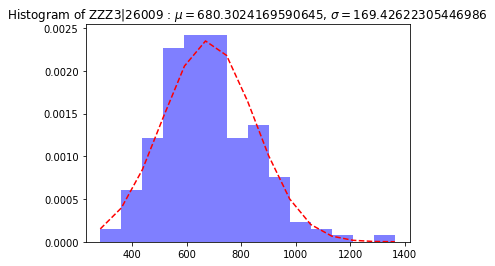

In [113]:
hist_col("ZZZ3|26009",RNASeq,RNASeq_description)

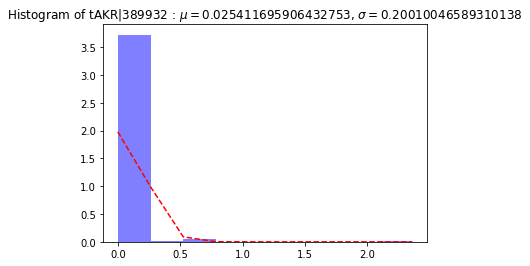

In [114]:
hist_col("tAKR|389932",RNASeq,RNASeq_description)

## Somatic mutation data

In [115]:
SomaticMutation=pd.read_csv(folder_Firebrowse_GBM+'Somatic_Mutation_GBM.maf.pct', sep="\t",header=0,index_col=0)
SomaticMutation.head()

,RNF17,REM1,REM2,PMM1,ASS1,FHIT,ZNF709,C6orf142,CAMK1,ZNF701,ZNF700,EN2,ZC3H13,RNF112,HMGCLL1,ZC3H18,PISD,DHX8,NUP98,XPC,SP1,GRINA,SP3,SP4,SP5,SP6,CAMKV,OR5B3,OPA3,RAB40A,COL7A1,GTSE1,OVCH1,SPPL2A,SPPL2B,MYO3A,ITGA9,MYO3B,ATP2A1,ATP2A3,ITGA1,ITGA2,NOP2,ITGA4,ITGA5,RIT1,ITGA7,TRHR,DENND4C,SWAP70,PHLDA1,PHLDA3,UFSP2,PAMR1,FBXL13,FBXL12,HRH2,HRH3,FBXL17,FBXL16,FBXL19,FBXL18,FAM116A,FAM169B,SDK1,SDK2,TPRN,THSD4,THSD1,COL4A6,COL4A5,COL4A4,COL4A3,COL4A2,COL4A1,OR8J3,CHST1,CHST2,CHST5,CHST4,CHST6,ITGAX,BCL2A1,ITGAV,HIBCH,ITGAM,HLF,NOV,ITGAD,ITGAE,FAM134A,TRERF1,LRPAP1,SMAD7,RIC3,SMAD3,MUS81,AMMECR1L,TMPRSS11A,IGF2R,TMPRSS11F,NECAP2,SLC36A3,SLC36A2,C14orf115,HYI,ZC3H15,ART1,ART5,ART4,RNF111,TCEA3,TCEA1,ABCD1,ABCD2,LAPTM4B,PIPOX,CADPS2,CCDC114,CCDC112,CCDC113,CCDC110,LEO1,ATP1A4,ATP1A3,ATP1A2,ATP1A1,MGRN1,SPHK2,DPT,IPO11,C2CD2,CPEB4,CPEB2,RBMXL1,RBMXL2,ZNF780A,ZNF780B,FRG1,SIRPA,IFT80,SARDH,NUP93,CREBL2,ATG4B,ATG4D,PHOX2B,NLRP14,KITLG,CFH,CFI,ANKFY1,C1orf14,CFB,OR5P2,MLLT4,CFP,AAAS,SIX4,SAGE1,VPS33A,CNPY4,NAALAD2,KNDC1,HMG20A,HMG20B,PHOSPHO2,CREB1,C3orf72,C3orf70,ZFP82,EFHA1,RFPL1,RFX4,RFX5,RFX6,RFX7,NRXN3,RFPL3,RFX2,RFX3,YDJC,FAM81B,APC,ETV3L,XPNPEP2,UQCRC1,ZNHIT3,PAPLN,ADNP,ZNF57,KHDRBS2,DCTN2,LHCGR,OR1Q1,GPR78,C11orf2,DPYSL5,DPYSL2,C11orf9,KRTAP10-12,KRTAP10-11,KRTAP10-10,IGFBP3,IGFBP1,HBE1,B4GALT2,CYP1B1,C15orf26,C15orf27,APLNR,GJA5,GJA8,CYP8B1,KDM3A,S1PR1,TMC4,TMC5,TMC6,TMC7,TMC1,TMC2,TMC3,TMC8,EIF2B1,PRKAR2B,MAGT1,C20orf54,TXNIP,TMEM14E,MECOM,ITGA2B,MYT1L,C9orf125,CFHR2,PHACTR4,CLIC4,CLIC5,L3MBTL,OR2K2,CFHR4,NLGN1,KIAA0020,RIT2,TMEM147,TMEM146,ASGR2,TMEM144,TMEM143,ITGA6,...,GBP7,MAN2A2,GBP5,GBP4,GRLF1,CORO2A,CCDC135,LCT,SPACA1,GALK2,SPACA3,OTOA,SLURP1,CCDC138,OR52I1,OTOF,STK31,STK35,STRC,PHF5A,AGTR1,NXNL2,LCK,GGNBP2,SYN1,ACCSL,THEG,PAPD5,C12orf12,CD5,CD6,CD7,CD2,AMN1,STAT6,APH1A,LAMC1,STAT3,STAT2,STAT1,FAM54B,FAM54A,CHRNB2,CHRNB4,CYP7A1,HSDL2,POLE2,HTATSF1,GABRB1,GABRB2,GABRB3,BTAF1,PODNL1,CDA,PLXNA3,PLXNA2,PLXNA1,ASNS,PLXNA4,PLG,PDE4A,PDE4B,PDE4C,PEG3,SCAI,RPL7,MRPS25,MAP2K3,BMPR1B,MAP2K7,NLRC4,SCAP,ADCYAP1R1,TSPAN9,NR1H3,TPRG1,ACY3,MALT1,PHF8,COL18A1,OR4P4,PPP2R5D,SUCLG1,OPRK1,GRPR,ALDOB,BAZ1A,PHF3,ABCC8,ABCC9,ABCC4,HAO1,HAO2,GPR176,COL20A1,TPR,DNAH17,DNAH10,DNAH11,TMOD3,TMOD2,ZNF79,APLP1,APLP2,ZNF71,ZNF76,ZNF77,RPL22L1,GLI2,RYR1,RYR3,RYR2,TBC1D22A,GOLGA1,GOLGA2,GOLGA3,GOLGA4,EGR1,SLCO3A1,AQP12A,KIAA1244,ENPP6,ENPP7,ENPP4,ENPP5,ENPP2,KIF26B,ENPP1,LELP1,BTN3A3,T,GIPC1,GIPC2,ELFN2,CIRH1A,FZR1,HBG2,CD2AP,CFHR5,DKKL1,KDM5D,TP53I13,CPS1,KDM5B,KDM5C,AIPL1,KCNA6,GLUL,OR56A4,DNM1,DNM2,TGFA,PREX2,PREX1,ZNF287,IFT122,ZNF285,ZNF282,ZNF283,AGXT2L1,OR2B11,SLC14A2,SLC14A1,GYS2,EVPL,ACAP3,STRN3,ETV5,ETV4,BTBD9,FAM5B,FAM5C,BTBD3,CFL2,SULT1B1,TUBA8,RAD23B,MESDC1,HRNR,NOM1,IKZF1,IKZF3,STON2,IL4I1,PLEKHG2,SPATS2,NFIB,ADAMTS13,SLC13A3,SLC13A4,SLC13A5,RGS14,RGS12,PSPH,GPR1,EXOSC8,ERN1,LANCL3,PHF20L1,HMX3,UTP3,CLEC16A,VCAN,SLC33A1,CCAR1,ANKAR,BTN2A2,SLC7A13,ELF5,ELF4,ZRSR2,PRPS2,CAND2,CAND1,CDR1,NDN,BRPF3,TTLL11,TTLL10,TTLL13,TTLL12,GMPR2,ODF2L,ACAP1,ACAP2,PLAT,LUZP4,C1orf198,OR10J1,LUZP2,OR10J3,C8orf84,NFIC,PLEKHG3,NFIA,PLEKHG1,PLEKHG6,PLEKHG7,PLEKHG4,PLEKHG5,SLC7A14,SELE,SLC7A10,SLC7A11,SIGLEC1,GNGT2,SELT,BCL6B,NFIX,SELP
patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GBM-06-6698-Tumor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [116]:
SomaticMutation.tail()

,RNF17,REM1,REM2,PMM1,ASS1,FHIT,ZNF709,C6orf142,CAMK1,ZNF701,ZNF700,EN2,ZC3H13,RNF112,HMGCLL1,ZC3H18,PISD,DHX8,NUP98,XPC,SP1,GRINA,SP3,SP4,SP5,SP6,CAMKV,OR5B3,OPA3,RAB40A,COL7A1,GTSE1,OVCH1,SPPL2A,SPPL2B,MYO3A,ITGA9,MYO3B,ATP2A1,ATP2A3,ITGA1,ITGA2,NOP2,ITGA4,ITGA5,RIT1,ITGA7,TRHR,DENND4C,SWAP70,PHLDA1,PHLDA3,UFSP2,PAMR1,FBXL13,FBXL12,HRH2,HRH3,FBXL17,FBXL16,FBXL19,FBXL18,FAM116A,FAM169B,SDK1,SDK2,TPRN,THSD4,THSD1,COL4A6,COL4A5,COL4A4,COL4A3,COL4A2,COL4A1,OR8J3,CHST1,CHST2,CHST5,CHST4,CHST6,ITGAX,BCL2A1,ITGAV,HIBCH,ITGAM,HLF,NOV,ITGAD,ITGAE,FAM134A,TRERF1,LRPAP1,SMAD7,RIC3,SMAD3,MUS81,AMMECR1L,TMPRSS11A,IGF2R,TMPRSS11F,NECAP2,SLC36A3,SLC36A2,C14orf115,HYI,ZC3H15,ART1,ART5,ART4,RNF111,TCEA3,TCEA1,ABCD1,ABCD2,LAPTM4B,PIPOX,CADPS2,CCDC114,CCDC112,CCDC113,CCDC110,LEO1,ATP1A4,ATP1A3,ATP1A2,ATP1A1,MGRN1,SPHK2,DPT,IPO11,C2CD2,CPEB4,CPEB2,RBMXL1,RBMXL2,ZNF780A,ZNF780B,FRG1,SIRPA,IFT80,SARDH,NUP93,CREBL2,ATG4B,ATG4D,PHOX2B,NLRP14,KITLG,CFH,CFI,ANKFY1,C1orf14,CFB,OR5P2,MLLT4,CFP,AAAS,SIX4,SAGE1,VPS33A,CNPY4,NAALAD2,KNDC1,HMG20A,HMG20B,PHOSPHO2,CREB1,C3orf72,C3orf70,ZFP82,EFHA1,RFPL1,RFX4,RFX5,RFX6,RFX7,NRXN3,RFPL3,RFX2,RFX3,YDJC,FAM81B,APC,ETV3L,XPNPEP2,UQCRC1,ZNHIT3,PAPLN,ADNP,ZNF57,KHDRBS2,DCTN2,LHCGR,OR1Q1,GPR78,C11orf2,DPYSL5,DPYSL2,C11orf9,KRTAP10-12,KRTAP10-11,KRTAP10-10,IGFBP3,IGFBP1,HBE1,B4GALT2,CYP1B1,C15orf26,C15orf27,APLNR,GJA5,GJA8,CYP8B1,KDM3A,S1PR1,TMC4,TMC5,TMC6,TMC7,TMC1,TMC2,TMC3,TMC8,EIF2B1,PRKAR2B,MAGT1,C20orf54,TXNIP,TMEM14E,MECOM,ITGA2B,MYT1L,C9orf125,CFHR2,PHACTR4,CLIC4,CLIC5,L3MBTL,OR2K2,CFHR4,NLGN1,KIAA0020,RIT2,TMEM147,TMEM146,ASGR2,TMEM144,TMEM143,ITGA6,...,GBP7,MAN2A2,GBP5,GBP4,GRLF1,CORO2A,CCDC135,LCT,SPACA1,GALK2,SPACA3,OTOA,SLURP1,CCDC138,OR52I1,OTOF,STK31,STK35,STRC,PHF5A,AGTR1,NXNL2,LCK,GGNBP2,SYN1,ACCSL,THEG,PAPD5,C12orf12,CD5,CD6,CD7,CD2,AMN1,STAT6,APH1A,LAMC1,STAT3,STAT2,STAT1,FAM54B,FAM54A,CHRNB2,CHRNB4,CYP7A1,HSDL2,POLE2,HTATSF1,GABRB1,GABRB2,GABRB3,BTAF1,PODNL1,CDA,PLXNA3,PLXNA2,PLXNA1,ASNS,PLXNA4,PLG,PDE4A,PDE4B,PDE4C,PEG3,SCAI,RPL7,MRPS25,MAP2K3,BMPR1B,MAP2K7,NLRC4,SCAP,ADCYAP1R1,TSPAN9,NR1H3,TPRG1,ACY3,MALT1,PHF8,COL18A1,OR4P4,PPP2R5D,SUCLG1,OPRK1,GRPR,ALDOB,BAZ1A,PHF3,ABCC8,ABCC9,ABCC4,HAO1,HAO2,GPR176,COL20A1,TPR,DNAH17,DNAH10,DNAH11,TMOD3,TMOD2,ZNF79,APLP1,APLP2,ZNF71,ZNF76,ZNF77,RPL22L1,GLI2,RYR1,RYR3,RYR2,TBC1D22A,GOLGA1,GOLGA2,GOLGA3,GOLGA4,EGR1,SLCO3A1,AQP12A,KIAA1244,ENPP6,ENPP7,ENPP4,ENPP5,ENPP2,KIF26B,ENPP1,LELP1,BTN3A3,T,GIPC1,GIPC2,ELFN2,CIRH1A,FZR1,HBG2,CD2AP,CFHR5,DKKL1,KDM5D,TP53I13,CPS1,KDM5B,KDM5C,AIPL1,KCNA6,GLUL,OR56A4,DNM1,DNM2,TGFA,PREX2,PREX1,ZNF287,IFT122,ZNF285,ZNF282,ZNF283,AGXT2L1,OR2B11,SLC14A2,SLC14A1,GYS2,EVPL,ACAP3,STRN3,ETV5,ETV4,BTBD9,FAM5B,FAM5C,BTBD3,CFL2,SULT1B1,TUBA8,RAD23B,MESDC1,HRNR,NOM1,IKZF1,IKZF3,STON2,IL4I1,PLEKHG2,SPATS2,NFIB,ADAMTS13,SLC13A3,SLC13A4,SLC13A5,RGS14,RGS12,PSPH,GPR1,EXOSC8,ERN1,LANCL3,PHF20L1,HMX3,UTP3,CLEC16A,VCAN,SLC33A1,CCAR1,ANKAR,BTN2A2,SLC7A13,ELF5,ELF4,ZRSR2,PRPS2,CAND2,CAND1,CDR1,NDN,BRPF3,TTLL11,TTLL10,TTLL13,TTLL12,GMPR2,ODF2L,ACAP1,ACAP2,PLAT,LUZP4,C1orf198,OR10J1,LUZP2,OR10J3,C8orf84,NFIC,PLEKHG3,NFIA,PLEKHG1,PLEKHG6,PLEKHG7,PLEKHG4,PLEKHG5,SLC7A14,SELE,SLC7A10,SLC7A11,SIGLEC1,GNGT2,SELT,BCL6B,NFIX,SELP
patient,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GBM-06-2563-Tumor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [117]:
SomaticMutation_description=SomaticMutation.describe()
SomaticMutation_description.head(10)

,RNF17,REM1,REM2,PMM1,ASS1,FHIT,ZNF709,C6orf142,CAMK1,ZNF701,ZNF700,EN2,ZC3H13,RNF112,HMGCLL1,ZC3H18,PISD,DHX8,NUP98,XPC,SP1,GRINA,SP3,SP4,SP5,SP6,CAMKV,OR5B3,OPA3,RAB40A,COL7A1,GTSE1,OVCH1,SPPL2A,SPPL2B,MYO3A,ITGA9,MYO3B,ATP2A1,ATP2A3,ITGA1,ITGA2,NOP2,ITGA4,ITGA5,RIT1,ITGA7,TRHR,DENND4C,SWAP70,PHLDA1,PHLDA3,UFSP2,PAMR1,FBXL13,FBXL12,HRH2,HRH3,FBXL17,FBXL16,FBXL19,FBXL18,FAM116A,FAM169B,SDK1,SDK2,TPRN,THSD4,THSD1,COL4A6,COL4A5,COL4A4,COL4A3,COL4A2,COL4A1,OR8J3,CHST1,CHST2,CHST5,CHST4,CHST6,ITGAX,BCL2A1,ITGAV,HIBCH,ITGAM,HLF,NOV,ITGAD,ITGAE,FAM134A,TRERF1,LRPAP1,SMAD7,RIC3,SMAD3,MUS81,AMMECR1L,TMPRSS11A,IGF2R,TMPRSS11F,NECAP2,SLC36A3,SLC36A2,C14orf115,HYI,ZC3H15,ART1,ART5,ART4,RNF111,TCEA3,TCEA1,ABCD1,ABCD2,LAPTM4B,PIPOX,CADPS2,CCDC114,CCDC112,CCDC113,CCDC110,LEO1,ATP1A4,ATP1A3,ATP1A2,ATP1A1,MGRN1,SPHK2,DPT,IPO11,C2CD2,CPEB4,CPEB2,RBMXL1,RBMXL2,ZNF780A,ZNF780B,FRG1,SIRPA,IFT80,SARDH,NUP93,CREBL2,ATG4B,ATG4D,PHOX2B,NLRP14,KITLG,CFH,CFI,ANKFY1,C1orf14,CFB,OR5P2,MLLT4,CFP,AAAS,SIX4,SAGE1,VPS33A,CNPY4,NAALAD2,KNDC1,HMG20A,HMG20B,PHOSPHO2,CREB1,C3orf72,C3orf70,ZFP82,EFHA1,RFPL1,RFX4,RFX5,RFX6,RFX7,NRXN3,RFPL3,RFX2,RFX3,YDJC,FAM81B,APC,ETV3L,XPNPEP2,UQCRC1,ZNHIT3,PAPLN,ADNP,ZNF57,KHDRBS2,DCTN2,LHCGR,OR1Q1,GPR78,C11orf2,DPYSL5,DPYSL2,C11orf9,KRTAP10-12,KRTAP10-11,KRTAP10-10,IGFBP3,IGFBP1,HBE1,B4GALT2,CYP1B1,C15orf26,C15orf27,APLNR,GJA5,GJA8,CYP8B1,KDM3A,S1PR1,TMC4,TMC5,TMC6,TMC7,TMC1,TMC2,TMC3,TMC8,EIF2B1,PRKAR2B,MAGT1,C20orf54,TXNIP,TMEM14E,MECOM,ITGA2B,MYT1L,C9orf125,CFHR2,PHACTR4,CLIC4,CLIC5,L3MBTL,OR2K2,CFHR4,NLGN1,KIAA0020,RIT2,TMEM147,TMEM146,ASGR2,TMEM144,TMEM143,ITGA6,...,GBP7,MAN2A2,GBP5,GBP4,GRLF1,CORO2A,CCDC135,LCT,SPACA1,GALK2,SPACA3,OTOA,SLURP1,CCDC138,OR52I1,OTOF,STK31,STK35,STRC,PHF5A,AGTR1,NXNL2,LCK,GGNBP2,SYN1,ACCSL,THEG,PAPD5,C12orf12,CD5,CD6,CD7,CD2,AMN1,STAT6,APH1A,LAMC1,STAT3,STAT2,STAT1,FAM54B,FAM54A,CHRNB2,CHRNB4,CYP7A1,HSDL2,POLE2,HTATSF1,GABRB1,GABRB2,GABRB3,BTAF1,PODNL1,CDA,PLXNA3,PLXNA2,PLXNA1,ASNS,PLXNA4,PLG,PDE4A,PDE4B,PDE4C,PEG3,SCAI,RPL7,MRPS25,MAP2K3,BMPR1B,MAP2K7,NLRC4,SCAP,ADCYAP1R1,TSPAN9,NR1H3,TPRG1,ACY3,MALT1,PHF8,COL18A1,OR4P4,PPP2R5D,SUCLG1,OPRK1,GRPR,ALDOB,BAZ1A,PHF3,ABCC8,ABCC9,ABCC4,HAO1,HAO2,GPR176,COL20A1,TPR,DNAH17,DNAH10,DNAH11,TMOD3,TMOD2,ZNF79,APLP1,APLP2,ZNF71,ZNF76,ZNF77,RPL22L1,GLI2,RYR1,RYR3,RYR2,TBC1D22A,GOLGA1,GOLGA2,GOLGA3,GOLGA4,EGR1,SLCO3A1,AQP12A,KIAA1244,ENPP6,ENPP7,ENPP4,ENPP5,ENPP2,KIF26B,ENPP1,LELP1,BTN3A3,T,GIPC1,GIPC2,ELFN2,CIRH1A,FZR1,HBG2,CD2AP,CFHR5,DKKL1,KDM5D,TP53I13,CPS1,KDM5B,KDM5C,AIPL1,KCNA6,GLUL,OR56A4,DNM1,DNM2,TGFA,PREX2,PREX1,ZNF287,IFT122,ZNF285,ZNF282,ZNF283,AGXT2L1,OR2B11,SLC14A2,SLC14A1,GYS2,EVPL,ACAP3,STRN3,ETV5,ETV4,BTBD9,FAM5B,FAM5C,BTBD3,CFL2,SULT1B1,TUBA8,RAD23B,MESDC1,HRNR,NOM1,IKZF1,IKZF3,STON2,IL4I1,PLEKHG2,SPATS2,NFIB,ADAMTS13,SLC13A3,SLC13A4,SLC13A5,RGS14,RGS12,PSPH,GPR1,EXOSC8,ERN1,LANCL3,PHF20L1,HMX3,UTP3,CLEC16A,VCAN,SLC33A1,CCAR1,ANKAR,BTN2A2,SLC7A13,ELF5,ELF4,ZRSR2,PRPS2,CAND2,CAND1,CDR1,NDN,BRPF3,TTLL11,TTLL10,TTLL13,TTLL12,GMPR2,ODF2L,ACAP1,ACAP2,PLAT,LUZP4,C1orf198,OR10J1,LUZP2,OR10J3,C8orf84,NFIC,PLEKHG3,NFIA,PLEKHG1,PLEKHG6,PLEKHG7,PLEKHG4,PLEKHG5,SLC7A14,SELE,SLC7A10,SLC7A11,SIGLEC1,GNGT2,SELT,BCL6B,NFIX,SELP
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000

In [118]:
SomaticMutation.shape

(291, 9539)

# Selection of the training and testing datasets for the SBC model

In [ ]:
#How many patients do we have CopyNumber, mRNAArray and miRNA

We have 577 patients with CopyNumber data, 575 patients with miRNA data and 538 patients with mRNAArray data.

In [120]:
ela=dict()
cat=dict()
for label in clinical.index:
    ela[label]=[]
    cat[label]=[]

for j in clinical.index.tolist():
    track=False
    for i in miRNA.index.tolist():
        if j in i:
            ela[j].append(i)
            track=True
    if track==True:
        cat[j].append(1)
    else:
        cat[j].append(0)
    
for j in clinical.index.tolist():
    track=False
    for i in mRNAArray.index.tolist():
        if j in i:
            ela[j].append(i)
            track=True
    if track==True:
        cat[j].append(1)
    else:
        cat[j].append(0)
            
for j in clinical.index.tolist():
    track=False
    for i in CopyNumber.index.tolist():
        if j in i:
            ela[j].append(i)
            track=True
    if track==True:
        cat[j].append(1)
    else:
        cat[j].append(0)
        
for j in clinical.index.tolist():
    track=False
    for i in SomaticMutation.index.tolist():
        if j[5:] in i:
            ela[j].append(i)
            track=True
    if track==True:
        cat[j].append(1)
    else:
        cat[j].append(0)

In [121]:
ela

{'TCGA-02-0001': ['TCGA-02-0001', 'TCGA-02-0001', 'TCGA-02-0001'],
 'TCGA-02-0003': ['TCGA-02-0003',
  'TCGA-02-0003',
  'TCGA-02-0003',
  'GBM-02-0003-Tumor'],
 'TCGA-02-0004': ['TCGA-02-0004', 'TCGA-02-0004'],
 'TCGA-02-0006': ['TCGA-02-0006', 'TCGA-02-0006'],
 'TCGA-02-0007': ['TCGA-02-0007', 'TCGA-02-0007', 'TCGA-02-0007'],
 'TCGA-02-0009': ['TCGA-02-0009', 'TCGA-02-0009', 'TCGA-02-0009'],
 'TCGA-02-0010': ['TCGA-02-0010', 'TCGA-02-0010', 'TCGA-02-0010'],
 'TCGA-02-0011': ['TCGA-02-0011', 'TCGA-02-0011', 'TCGA-02-0011'],
 'TCGA-02-0014': ['TCGA-02-0014', 'TCGA-02-0014', 'TCGA-02-0014'],
 'TCGA-02-0015': ['TCGA-02-0015', 'TCGA-02-0015', 'TCGA-02-0015'],
 'TCGA-02-0016': ['TCGA-02-0016', 'TCGA-02-0016', 'TCGA-02-0016'],
 'TCGA-02-0021': ['TCGA-02-0021', 'TCGA-02-0021', 'TCGA-02-0021'],
 'TCGA-02-0023': ['TCGA-02-0023', 'TCGA-02-0023', 'TCGA-02-0023'],
 'TCGA-02-0024': ['TCGA-02-0024', 'TCGA-02-0024', 'TCGA-02-0024'],
 'TCGA-02-0025': ['TCGA-02-0025', 'TCGA-02-0025', 'TCGA-02-0025'],


In [122]:
result=list()
for each in ela.keys():
    if len(ela[each])==2 and each not in result:
        result.append(each)
len(result)

30

In [123]:
Final_dataset=pd.DataFrame.from_dict(cat, orient='index',columns=['miRNA', 'mRNAArray', 'CopyNumber', 'SomaticMutation'])
Final_dataset["Total"]=Final_dataset.sum(axis=1)
Final_dataset.head()

,miRNA,mRNAArray,CopyNumber,SomaticMutation,Total
TCGA-06-6391,1,1,1,1,4
TCGA-19-A6J4,0,0,1,0,1
TCGA-06-1806,1,0,1,1,3
TCGA-06-5408,1,1,1,1,4
TCGA-06-5410,1,1,1,1,4


In [124]:
#We have 517 patients with both miRNA and mRNAArray data

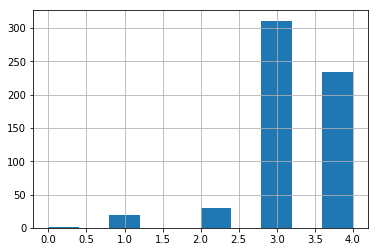

In [125]:
Final_dataset["Total"].hist()

In [126]:
howmany=0
for i in Verhaak_id:
    for j in SomaticMutation.index.tolist():
        if i[5:11] in j[4:10]:
            howmany=howmany+1

In [127]:
#274 patients from the Verhaak sample have somatic mutation data

In [128]:
howmany

274

In [129]:
Final_dataset=Final_dataset.join(Sample_status,how="left")
Final_dataset.tail()

,miRNA,mRNAArray,CopyNumber,SomaticMutation,Total,Subtype,vital_status,days_to_death
TCGA-76-6283,1,0,1,1,3,NaN,NaN,NaN
TCGA-76-6660,1,0,1,1,3,NaN,NaN,NaN
TCGA-81-5910,1,1,1,1,4,NaN,NaN,NaN
TCGA-81-5911,1,0,1,1,3,NaN,NaN,NaN
TCGA-87-5896,1,1,1,1,4,NaN,NaN,NaN


In [130]:
#Training Dataset
#Part of the Verhaak + mRNA + miRNA

In [131]:
Training_set=Final_dataset[(Final_dataset.miRNA==1)&(Final_dataset.mRNAArray==1)&(Final_dataset.CopyNumber==1)&(Final_dataset.Subtype)]
Training_set

,miRNA,mRNAArray,CopyNumber,SomaticMutation,Total,Subtype,vital_status,days_to_death
TCGA-02-0003,1,1,1,1,4,Proneural,1.0,144.0
TCGA-02-0007,1,1,1,0,3,Classical,1.0,705.0
TCGA-02-0009,1,1,1,0,3,Classical,1.0,322.0
TCGA-02-0010,1,1,1,0,3,Proneural,1.0,1077.0
TCGA-02-0011,1,1,1,0,3,Proneural,1.0,630.0
TCGA-02-0014,1,1,1,0,3,Proneural,1.0,2512.0
TCGA-02-0016,1,1,1,0,3,Classical,1.0,2648.0
TCGA-02-0021,1,1,1,0,3,Classical,1.0,2362.0
TCGA-02-0023,1,1,1,0,3,Classical,1.0,612.0
TCGA-02-0024,1,1,1,0,3,Proneural,1.0,1615.0


In [132]:
Training_set.shape

(160, 8)

In [133]:
mRNAArray.loc[Training_set.index.tolist()].to_csv(folder_TrainingSet+"mRNAArray_TrainingSet.csv")

In [134]:
miRNA.loc[Training_set.index.tolist()].to_csv(folder_TrainingSet+"miRNA_TrainingSet.csv")

In [135]:
CopyNumber.loc[Training_set.index.tolist()].to_csv(folder_TrainingSet+"CopyNumber_TrainingSet.csv")

In [142]:
clinical_TrainingSet=clinical.loc[Training_set.index.tolist()].join(Training_set["Subtype"],how="left")
clinical_TrainingSet.to_csv(folder_TrainingSet+"Clinical_TrainingSet.csv")

In [167]:
Training_set["Subtype"].to_csv(folder_Verhaak+"Verhaak_GS_according_to_Training_Set_Split1.csv")

TRAINING SET SIZE= 160

In [137]:
TestSet=Final_dataset[(Final_dataset.miRNA==1)&(Final_dataset.mRNAArray==1)&(Final_dataset.CopyNumber==1)&(Final_dataset.Subtype.isnull())]
TestSet

,miRNA,mRNAArray,CopyNumber,SomaticMutation,Total,Subtype,vital_status,days_to_death
TCGA-06-6391,1,1,1,1,4,NaN,NaN,NaN
TCGA-06-5408,1,1,1,1,4,NaN,NaN,NaN
TCGA-06-5410,1,1,1,1,4,NaN,NaN,NaN
TCGA-06-5411,1,1,1,1,4,NaN,NaN,NaN
TCGA-06-5412,1,1,1,1,4,NaN,NaN,NaN
TCGA-06-5413,1,1,1,1,4,NaN,NaN,NaN
TCGA-06-5414,1,1,1,1,4,NaN,NaN,NaN
TCGA-06-5415,1,1,1,1,4,NaN,NaN,NaN
TCGA-06-5416,1,1,1,0,3,NaN,NaN,NaN
TCGA-06-5418,1,1,1,1,4,NaN,NaN,NaN


In [138]:
mRNAArray.loc[TestSet.index.tolist()].to_csv(folder_TestSet+"mRNAArray_TestSet.csv")

miRNA.loc[TestSet.index.tolist()].to_csv(folder_TestSet+"miRNA_TestSet.csv")

CopyNumber.loc[TestSet.index.tolist()].to_csv(folder_TestSet+"CopyNumber_TestSet.csv")

clinical.loc[TestSet.index.tolist()].to_csv(folder_TestSet+"Clinical_TestSet.csv")

In [139]:
TestSet.shape

(338, 8)

In [221]:
sbc_signature=pd.read_csv("SBC/sbc_signature.csv",index_col=0)["x"].values
Y_Ynew=mRNAArray.loc[Training_set.index.tolist(),sbc_signature]
to_drop=clinical_TrainingSet.index[clinical_TrainingSet['days_to_death'].isna()].tolist()
Y_Ynew=Y_Ynew.drop(index=to_drop)
Y_Ynew.shape

(154, 50)

In [222]:
l=list()
for i in range(154):
    if i<75:
        l.append("Y")
    else:
        l.append("Y.new")
result=pd.DataFrame(data=l,index=Y_Ynew.index)
result.columns=["target"]
result.head()

,target
TCGA-02-0003,Y
TCGA-02-0007,Y
TCGA-02-0009,Y
TCGA-02-0010,Y
TCGA-02-0011,Y


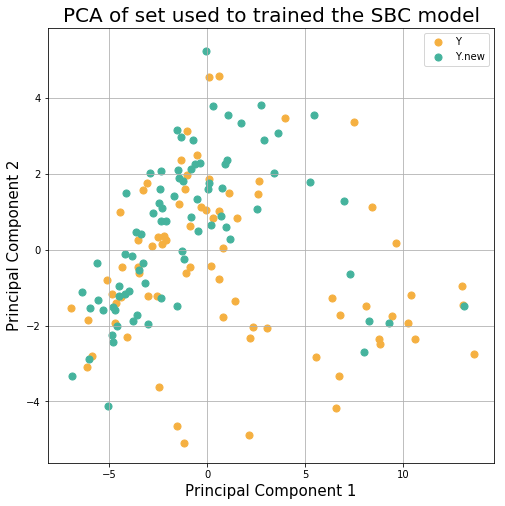

In [224]:
#Code to build the PCA plot
pca = decomposition.PCA(n_components=2)
PC = pca.fit_transform(Y_Ynew.values)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets=["Y","Y.new"]
colors = ["#F5B041", '#45B39D']
ax.set_title('PCA of set used to trained the SBC model', fontsize = 20)
for target,color in zip(targets,colors):
    indicesToKeep = result['target'] == target
    ax.scatter(PC[indicesToKeep,0]
               , PC[indicesToKeep,1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid() 

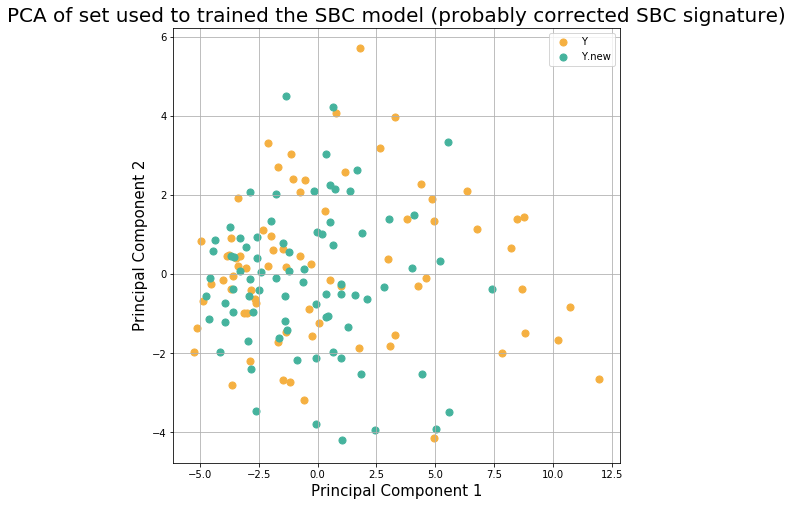

In [226]:
sbc_signature=pd.read_csv("SBC/Signature_SBC_2nd_attempt.csv",index_col=0)["x"].values
Y_Ynew=mRNAArray.loc[Training_set.index.tolist(),sbc_signature]
to_drop=clinical_TrainingSet.index[clinical_TrainingSet['days_to_death'].isna()].tolist()
Y_Ynew=Y_Ynew.drop(index=to_drop)
l=list()
for i in range(154):
    if i<75:
        l.append("Y")
    else:
        l.append("Y.new")
result=pd.DataFrame(data=l,index=Y_Ynew.index)
result.columns=["target"]
result.head()
#Code to build the PCA plot
pca = decomposition.PCA(n_components=2)
PC = pca.fit_transform(Y_Ynew.values)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets=["Y","Y.new"]
colors = ["#F5B041", '#45B39D']
ax.set_title('PCA of set used to trained the SBC model (probably corrected SBC signature)', fontsize = 20)
for target,color in zip(targets,colors):
    indicesToKeep = result['target'] == target
    ax.scatter(PC[indicesToKeep,0]
               , PC[indicesToKeep,1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid() 

Why should we do this PCA on the train+testing data? 

Because we don't want to have very different training and testing data (meaning my model shouldn't be trained on super biased data because it won't predict anything)